# Integrantes

* Silvio Ariel Ávalos
* Emanuel Orzusa
* Giulio Parodi

In [1]:
import pandas as pd
import os

* ### Eliminación de filas y columnas innecesarias de cada uno de los archivos indicando el directorio de los mismos.
* ### Los archivos son directamente modificados.
* ### Estos nuevos archivos (.csv) son convertidos a formato pickle iterando sobre el directorio de los archivos modificados, dichos archivos (.plk) son almacenados en un nuevo directorio, manteniendo así los .csv originales.

In [ ]:
import os
import pandas as pd

def process_csv(file_path):
    # Carga del archivo CSV
    df = pd.read_csv(file_path, low_memory=False)
    
    # Eliminar las primeras 3 filas
    df = df.drop(index=[0, 1, 2])
    
    # Restablecer el índice
    df.reset_index(drop=True, inplace=True)
    
    # Eliminar las columnas 3, 5, 7, 9, 11, 13, 15, 17
    columns_to_drop = df.columns[[2, 4, 6, 8, 10, 12, 14, 16]]
    df = df.drop(columns=columns_to_drop)
    
    # Renombrar las columnas
    column_names = ["Time", "Tachometer", "Motor", "Bearing 1 Z", "Bearing 1 Y", "Bearing 1 X", "Bearing 2 Z", "Bearing 2 Y", "Bearing 2 X", "Gearbox"]
    df.columns = column_names
    
    return df

def save_to_plk(df, output_path):
    # Guardar el DataFrame en formato .plk
    df.to_pickle(output_path)

input_folder = 'C:/Users/orzus/OneDrive/Documentos/1C 2024/IA/TP/dataset_csv/split25_csv'  
output_folder = 'C:/Users/orzus/OneDrive/Documentos/1C 2024/IA/TP/dataset_plk/split25_plk'  

# Importación de los datos desde una carpeta
os.makedirs(output_folder, exist_ok=True)

for filename in os.listdir(input_folder):
    if filename.endswith('.csv'):
        file_path = os.path.join(input_folder, filename)
        output_path = os.path.join(output_folder, filename.replace('.csv', '.plk'))
        
        try:
            # Procesar el archivo CSV
            df_cleaned = process_csv(file_path)
            
            # Guardar el archivo en formato .plk
            save_to_plk(df_cleaned, output_path)
        except Exception as e:
            print(f"Error processing file {filename}: {e}")

print("Proceso completado.")

* ### Se elige uno de los archivos para verificar que haya sido correctamente modificado y guardado.

## Visualizamos un escenario sin fallas

In [2]:
df=pd.read_pickle('C:/Users/orzus/OneDrive/Documentos/1C 2024/IA/TP/dataset_plk/split25_plk/(NoFault) No Fault Trial 1.plk')

* ### Se listan los primeros elementos para la visualización.

In [3]:
df.head()

,Time,Tachometer,Motor,Bearing 1 Z,Bearing 1 Y,Bearing 1 X,Bearing 2 Z,Bearing 2 Y,Bearing 2 X,Gearbox
0,0,-0.862248268,-0.006744791,0.001761446,-0.004679333,-0.013791326,-0.000338325,-0.022431522,0.011058366,0.008016799
1,0.00015625,-0.862027298,-0.00433829,0.003282426,-0.004456994,-0.011916785,0.00092303,-0.020547591,0.013693532,0.009252003
2,0.0003125,-0.861926177,-0.00433829,0.002058223,-0.005457519,-0.012816565,0.000255254,-0.0187006,0.011837781,0.010000611
3,0.00046875,-0.861742659,-0.005671121,0.001390476,-0.00523518,-0.013941289,0.000997227,-0.019365517,0.011429516,0.00992575
4,0.000625,-0.861795093,-0.004486382,0.003616299,-0.00460522,-0.013228964,-0.001414186,-0.019291637,0.012580082,0.009364294


* ### Ploteamos los datos en los distintos elementos y distintas direcciones en función del tiempo del archivo seleccionado.

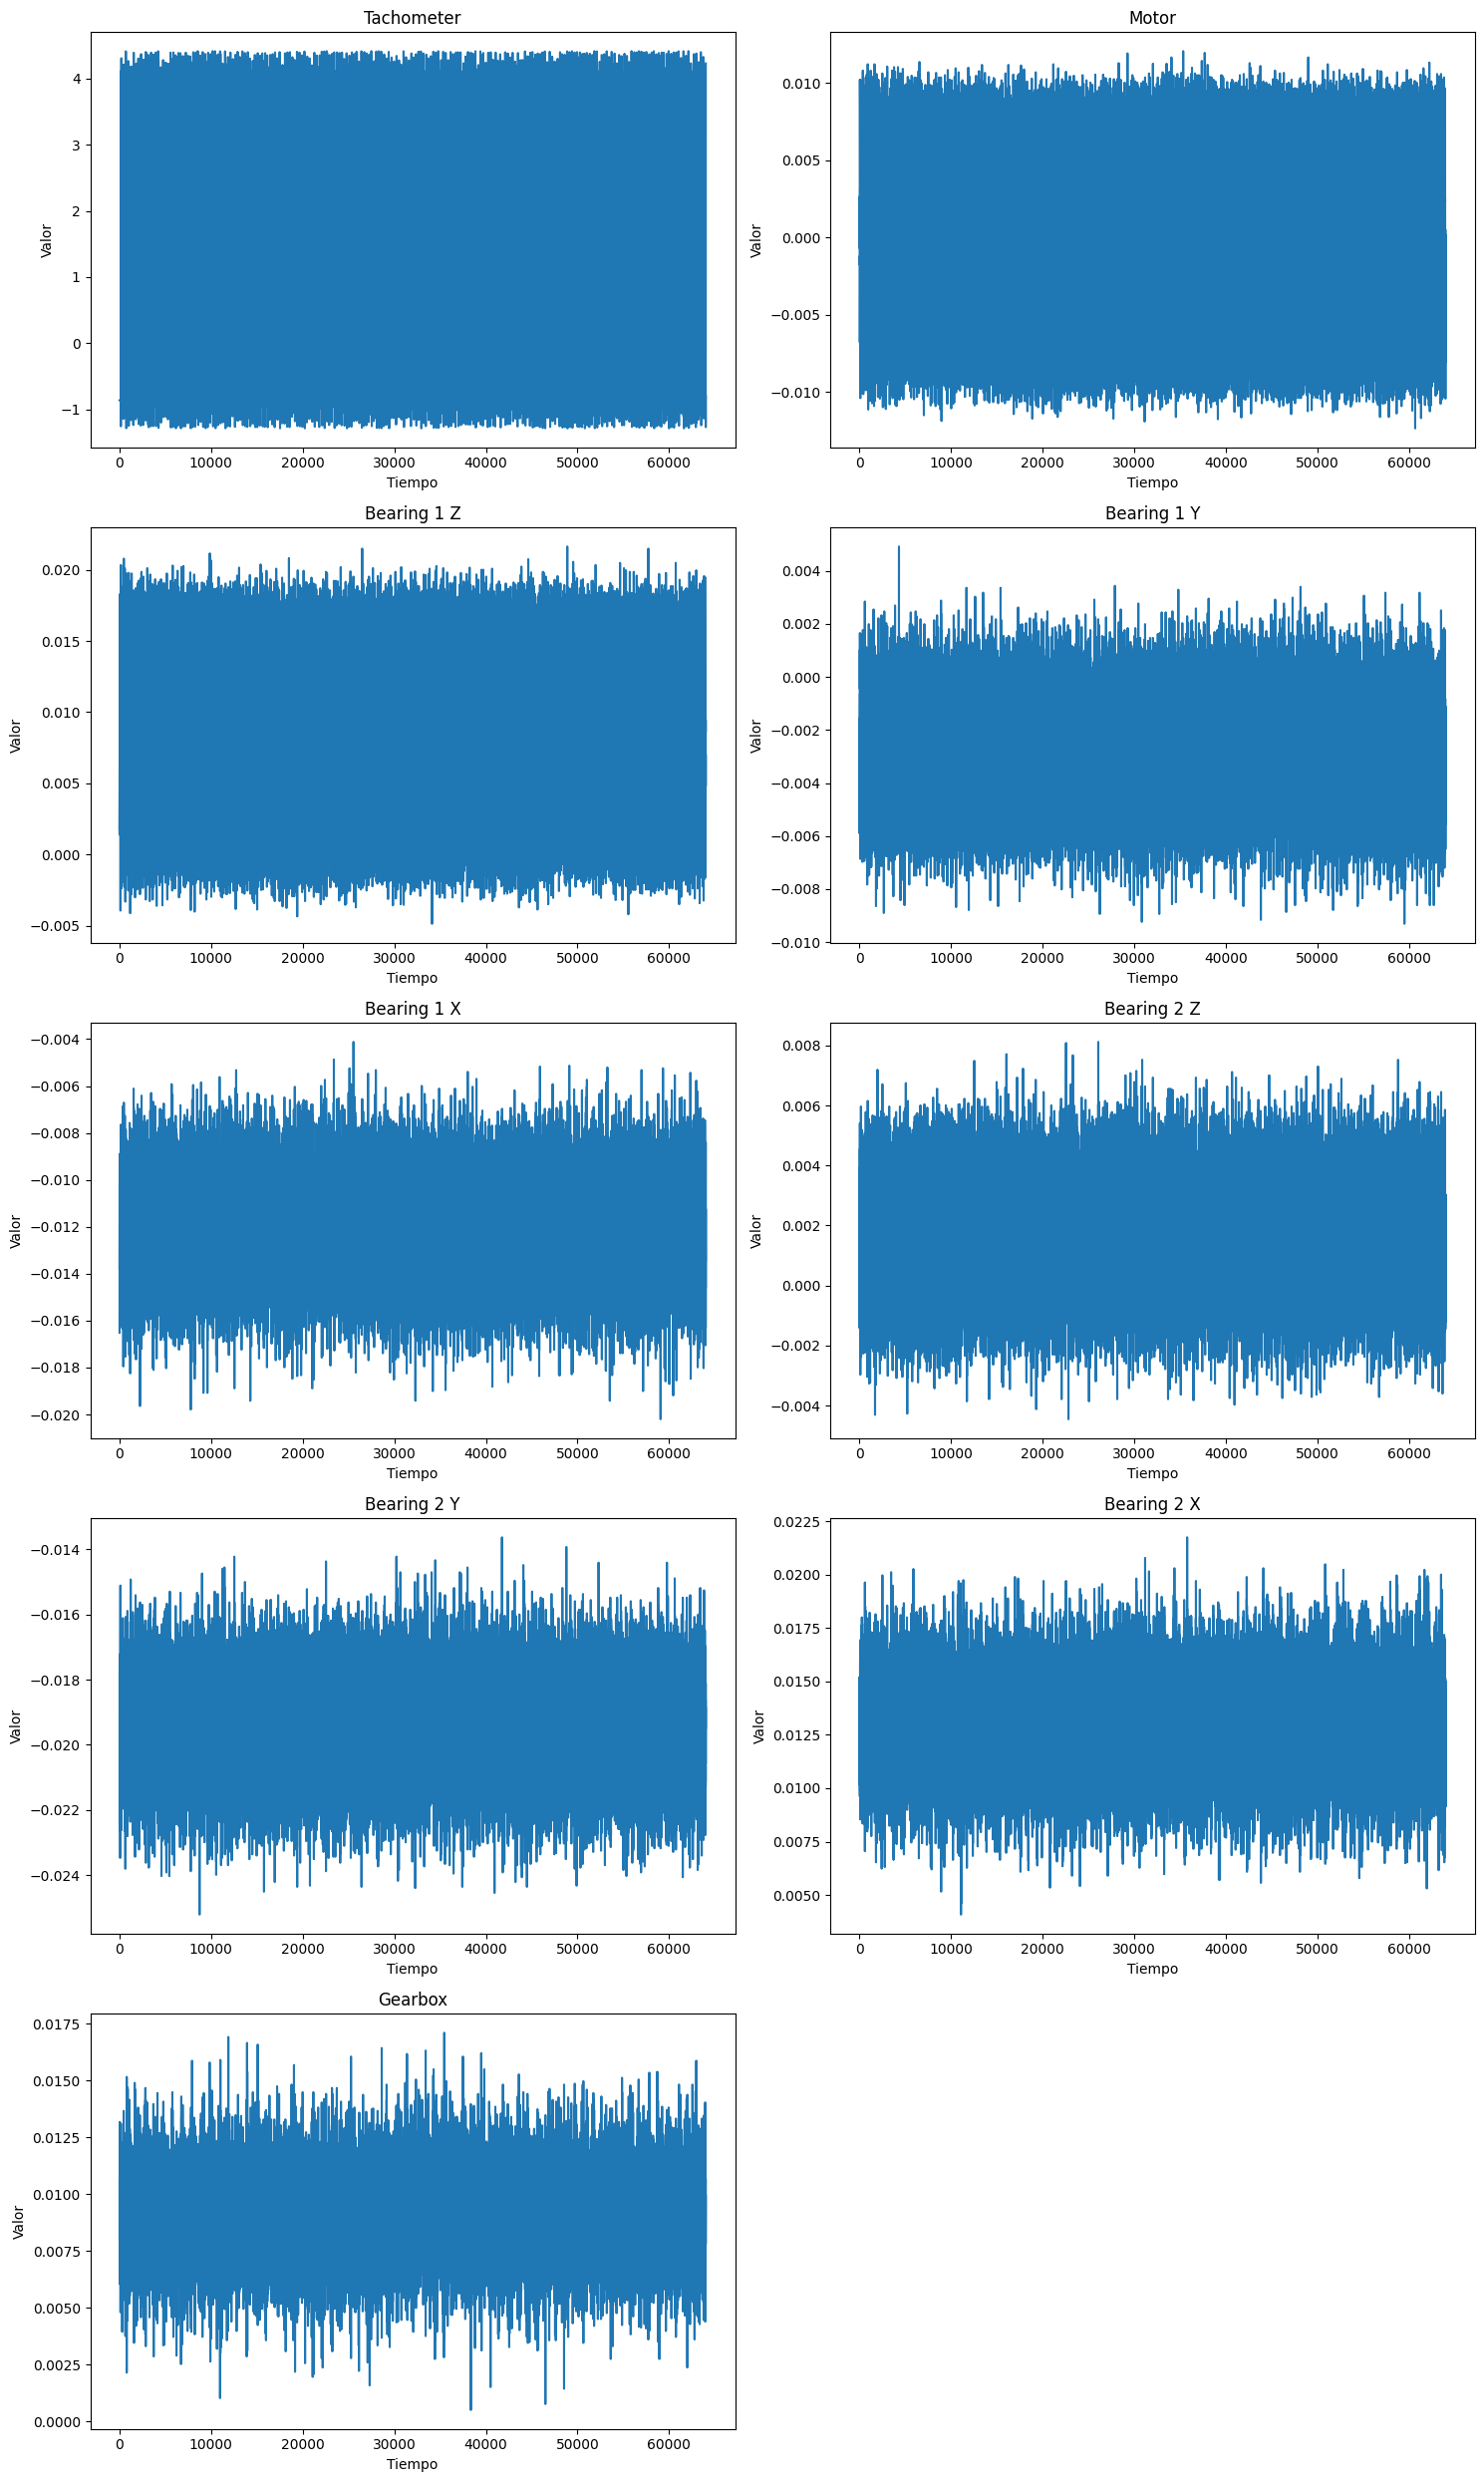

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar los datos
ruta_archivo = 'C:/Users/orzus/OneDrive/Documentos/1C 2024/IA/TP/dataset_plk/split25_plk/(NoFault) No Fault Trial 1.plk'
data = pd.read_pickle(ruta_archivo)

# Convertir todas las columnas a numérico, excepto 'Time'
for col in data.columns:
    if col != 'Time':
        data[col] = pd.to_numeric(data[col], errors='coerce')

# Seleccionar solo columnas numéricas y excluir 'Time'
data_numerica = data.drop(columns=['Time']).select_dtypes(include=[float, int])

# Número de columnas numéricas
num_columnas = len(data_numerica.columns)

# Crear subplots
fig, ejes = plt.subplots(nrows=(num_columnas // 2) + (num_columnas % 2), ncols=2, figsize=(15, 5 * ((num_columnas // 2) + (num_columnas % 2))))

# Aplanar la matriz de ejes para iterar fácilmente
ejes = ejes.flatten()

# Graficar cada columna numérica
for i, columna in enumerate(data_numerica.columns):
    data_numerica[columna].plot(ax=ejes[i], title=columna)
    ejes[i].set_xlabel('Tiempo')
    ejes[i].set_ylabel('Valor')

# Eliminar cualquier subplot no utilizado
for j in range(i + 1, len(ejes)):
    fig.delaxes(ejes[j])

plt.tight_layout()
plt.show()

* ### Visualizamos el espectro de frecuencias para cada una de las columnas.

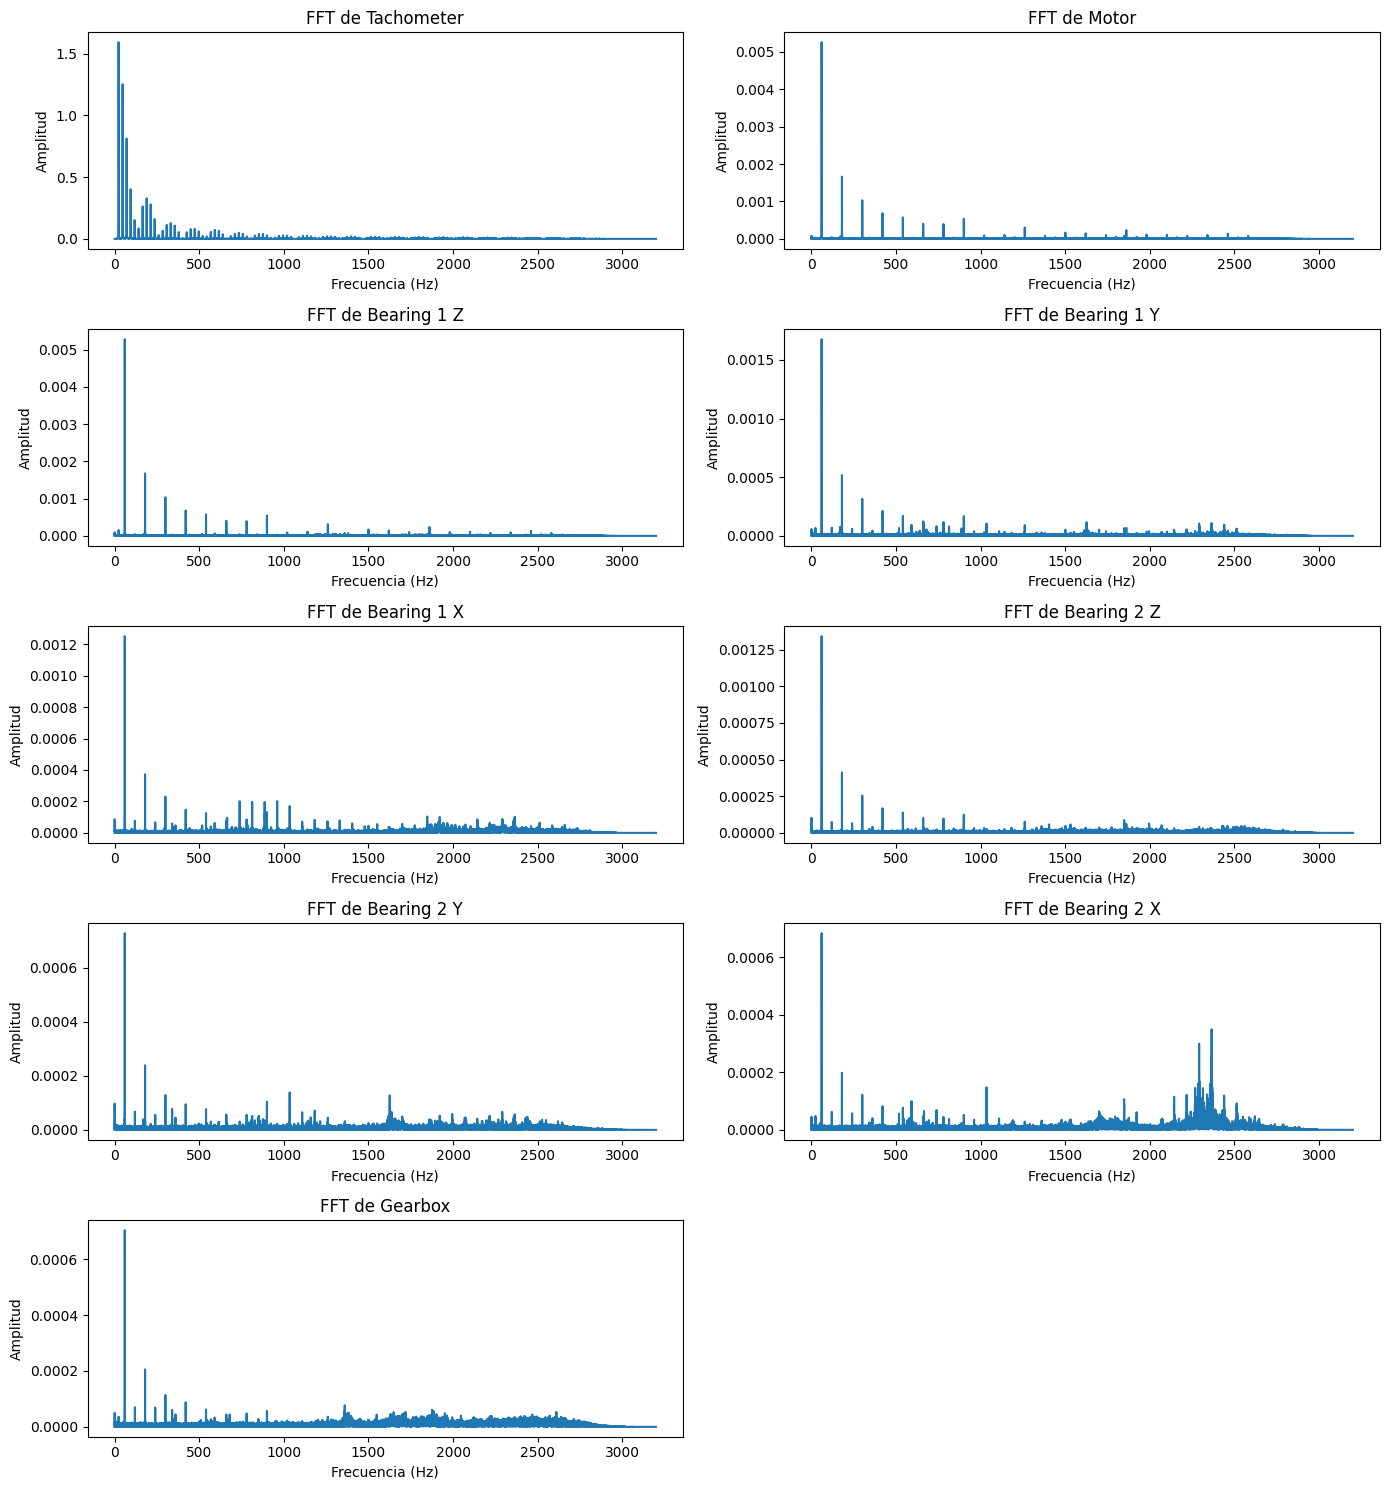

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

# Cargar el archivo .plk
file_path = 'C:/Users/orzus/OneDrive/Documentos/1C 2024/IA/TP/dataset_plk/split25_plk/(NoFault) No Fault Trial 2.plk'
data = pd.read_pickle(file_path)

# Convertir la columna 'Time' a valores numéricos
data['Time'] = pd.to_numeric(data['Time'])

# Función para graficar la FFT de una columna dada
def plot_fft(column_data, column_name, ax):
    N = len(column_data)
    T = data['Time'].iloc[1] - data['Time'].iloc[0]  # Intervalo de muestreo
    yf = fft(column_data)
    xf = fftfreq(N, T)[:N//2]

    # Eliminar el pico de frecuencia cero estableciéndolo a cero
    yf[0] = 0

    ax.plot(xf, 2.0/N * np.abs(yf[:N//2]))
    ax.set_title(f'FFT de {column_name}')
    ax.set_xlabel('Frecuencia (Hz)')
    ax.set_ylabel('Amplitud')

# Columnas a procesar (excluyendo 'Time')
columns_to_process = [col for col in data.columns if col != 'Time']

# Ajustar la creación de subplots para manejar un número impar de columnas
n_cols = 2
n_rows = (len(columns_to_process) + 1) // n_cols

# Crear subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(14, 3*n_rows))

# Aplanar la matriz de ejes para iteración fácil
axes = axes.flatten()

# Graficar la FFT para cada columna
for i, col in enumerate(columns_to_process):
    plot_fft(data[col], col, axes[i])

# Eliminar cualquier subplot no utilizado
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## Visualizamos un escenario con fallas

In [6]:
df=pd.read_pickle('C:/Users/orzus/OneDrive/Documentos/1C 2024/IA/TP/dataset_plk/split25_plk/(Fault) Bearing (1) Ball & Bearing (2) Combination Trial 1.plk')

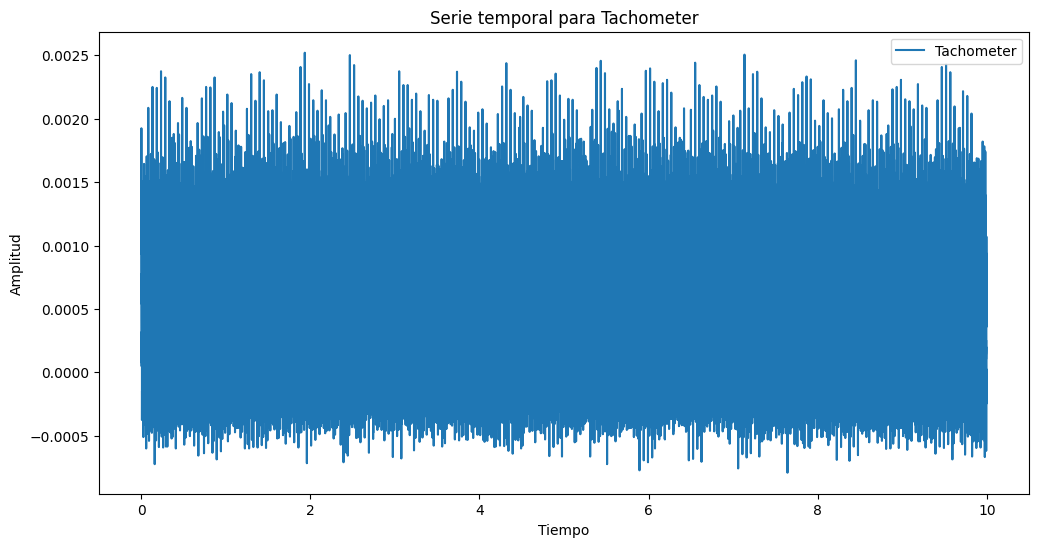

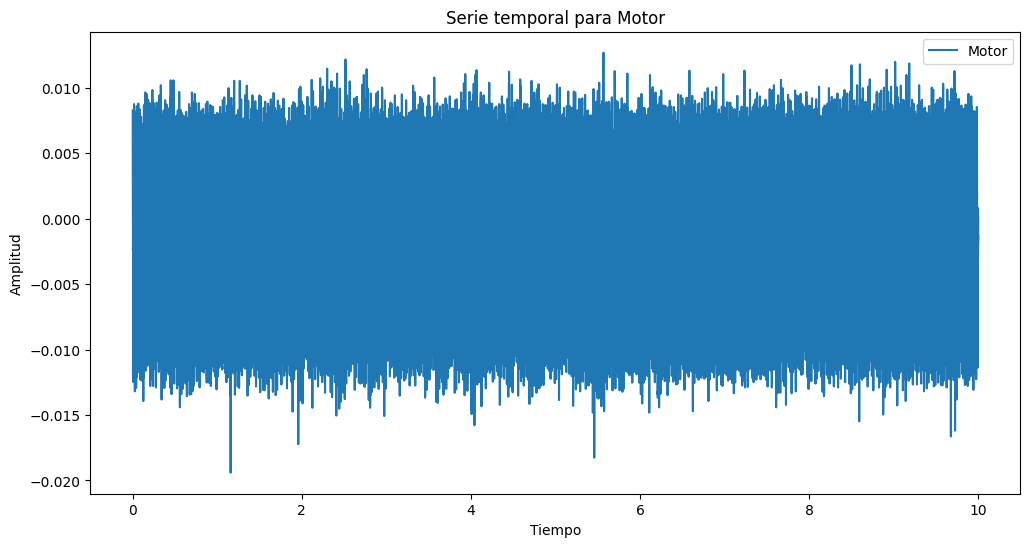

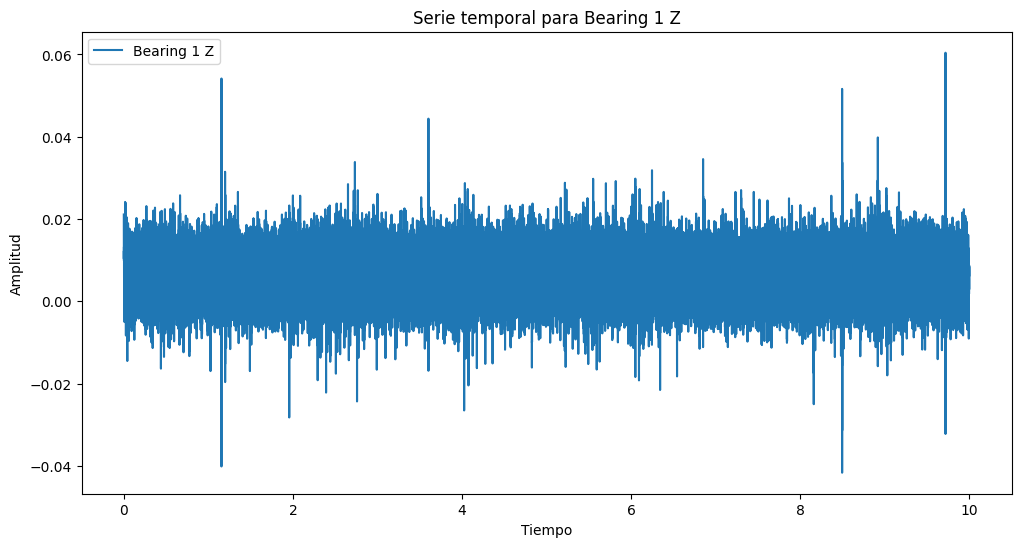

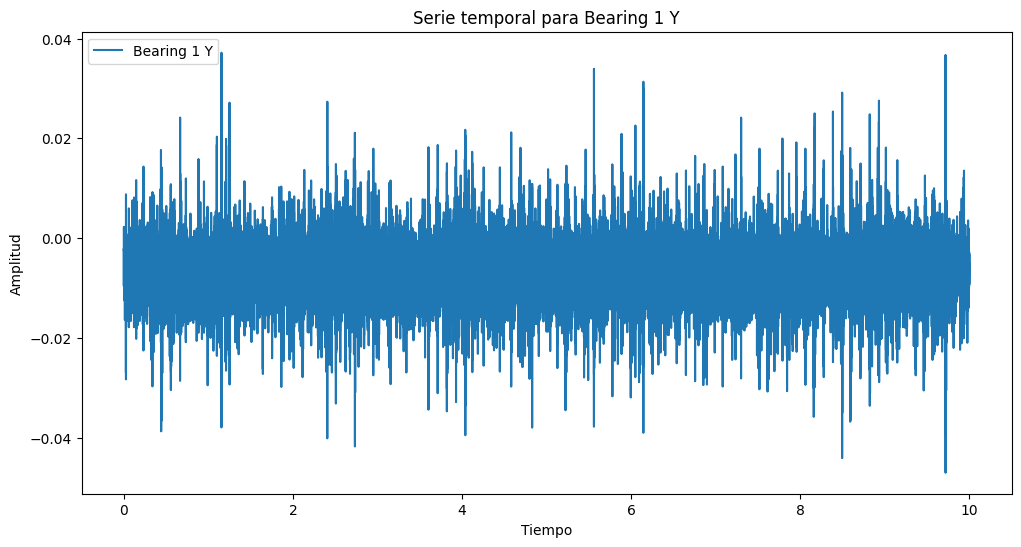

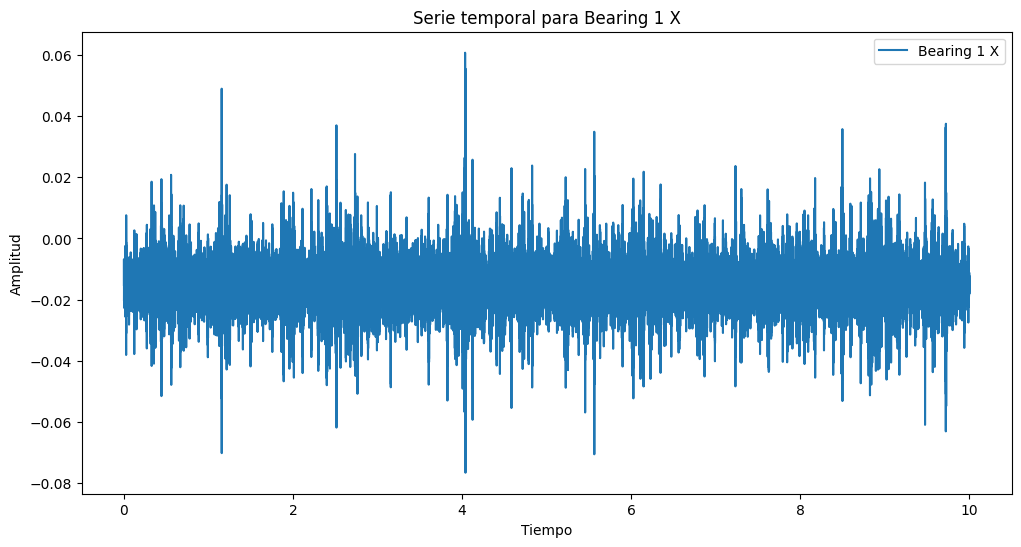

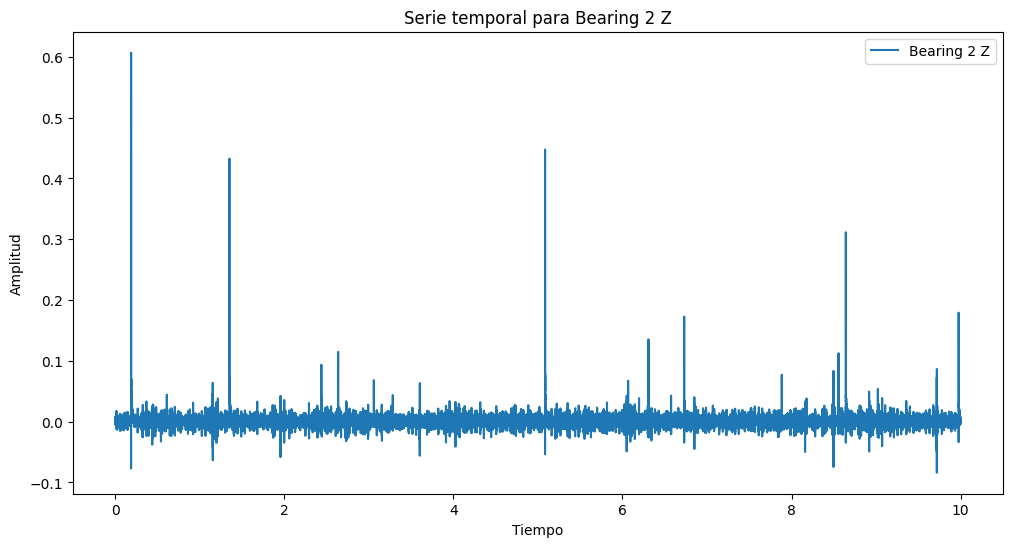

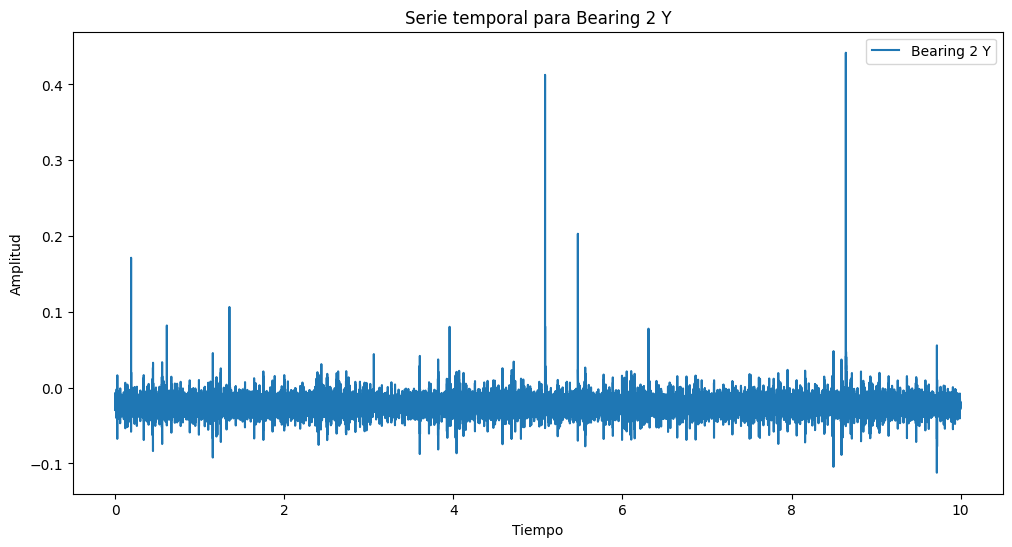

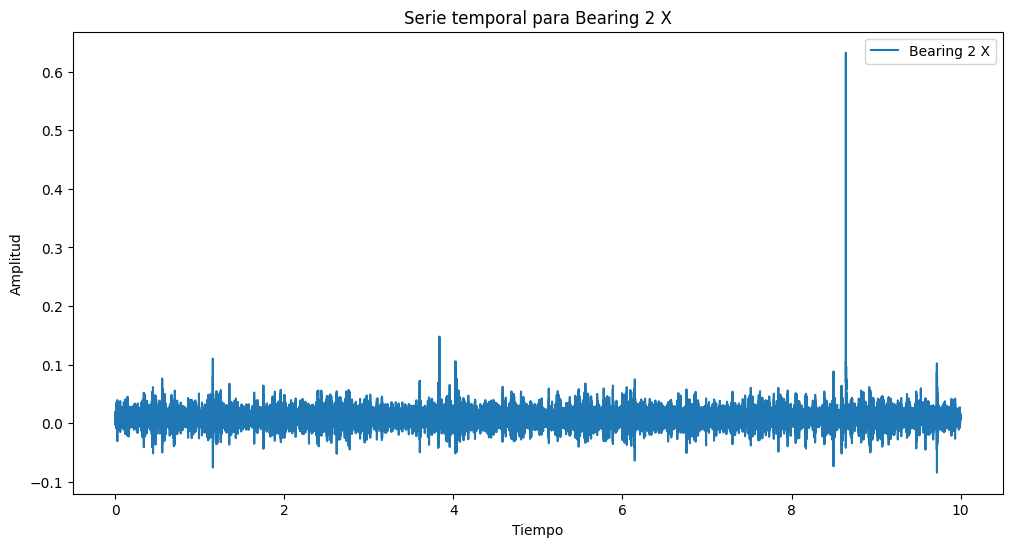

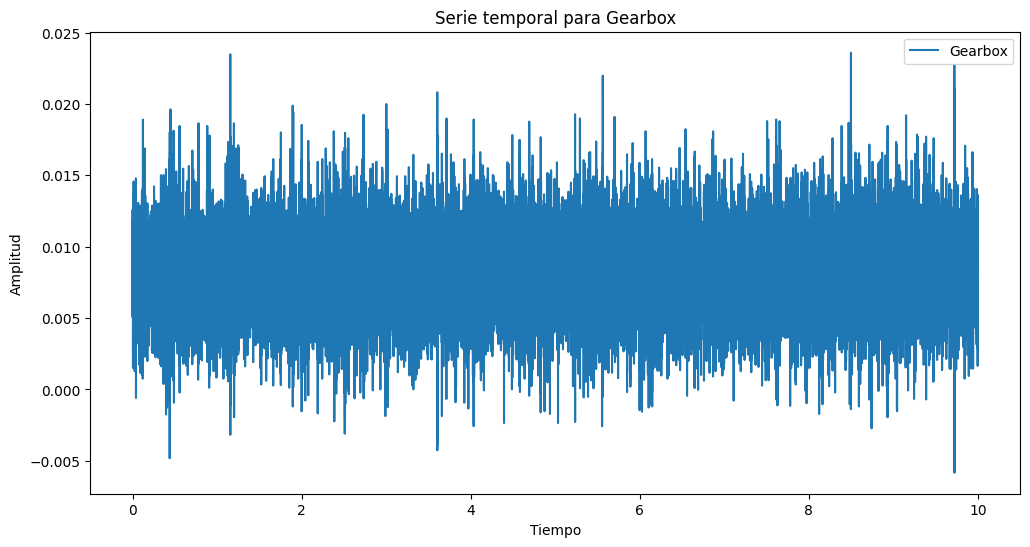

In [7]:
import matplotlib.pyplot as plt

# Convertir la columna 'Time' a tipo float
df['Time'] = df['Time'].astype(float)

# Graficar cada columna en función del tiempo en gráficos separados
for column in df.columns[1:]:  # Excluir la columna 'Time'
    plt.figure(figsize=(12, 6))
    plt.plot(df['Time'], df[column].astype(float), label=column)
    plt.xlabel('Tiempo')
    plt.ylabel('Amplitud')
    plt.title(f'Serie temporal para {column}')
    plt.legend()
    plt.show()

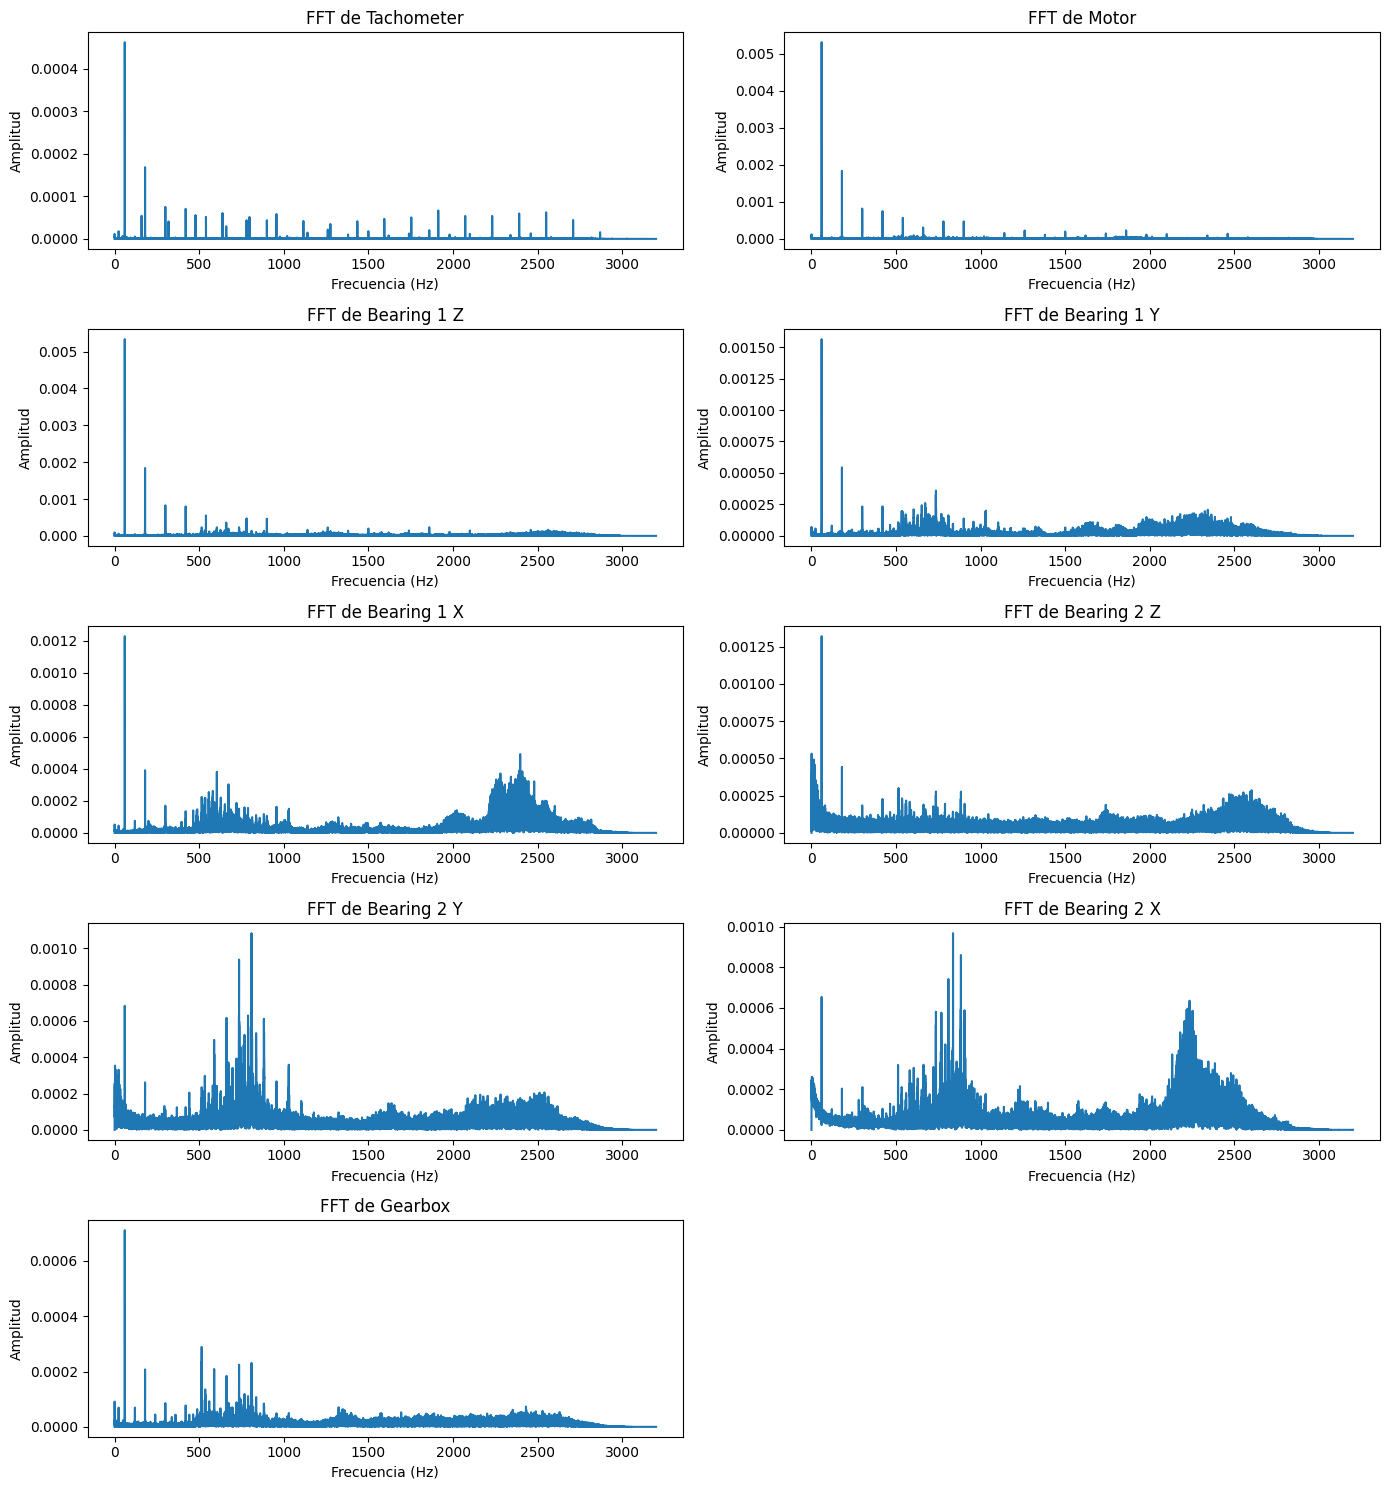

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

# Cargar el archivo .plk
file_path = 'C:/Users/orzus/OneDrive/Documentos/1C 2024/IA/TP/dataset_plk/split25_plk/(Fault) Bearing (1) Ball & Bearing (2) Combination Trial 1.plk'
data = pd.read_pickle(file_path)

# Convertir la columna 'Time' a valores numéricos
data['Time'] = pd.to_numeric(data['Time'])

# Función para graficar la FFT de una columna dada
def plot_fft(column_data, column_name, ax):
    N = len(column_data)
    T = data['Time'].iloc[1] - data['Time'].iloc[0]  # Intervalo de muestreo
    yf = fft(column_data)
    xf = fftfreq(N, T)[:N//2]

    # Eliminar el pico de frecuencia cero estableciéndolo a cero
    yf[0] = 0

    ax.plot(xf, 2.0/N * np.abs(yf[:N//2]))
    ax.set_title(f'FFT de {column_name}')
    ax.set_xlabel('Frecuencia (Hz)')
    ax.set_ylabel('Amplitud')

# Columnas a procesar (excluyendo 'Time')
columns_to_process = [col for col in data.columns if col != 'Time']

# Ajustar la creación de subplots para manejar un número impar de columnas
n_cols = 2
n_rows = (len(columns_to_process) + 1) // n_cols

# Crear subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(14, 3*n_rows))

# Aplanar la matriz de ejes para iteración fácil
axes = axes.flatten()

# Graficar la FFT para cada columna
for i, col in enumerate(columns_to_process):
    plot_fft(data[col], col, axes[i])

# Eliminar cualquier subplot no utilizado
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

* ### En la siguiente celda buscamos indicar cuáles son los archivos que poseen fallas y cuales no mediante un ciclo iterativo.
  Aquí lo que hacemos es recorrer el directorio donde están nuestros archivos y los renombramos de tal manera a saber cuáles son los datasets que tienen las fallas y las que no.
 

In [52]:
import os

# Ruta de la carpeta donde están los archivos PLK
folder_path = 'C:/Users/orzus/OneDrive/Documentos/1C 2024/IA/TP/dataset_plk/split75_plk'

# Itera sobre todos los archivos en la carpeta
for filename in os.listdir(folder_path):
    # Verifica si el archivo tiene la extensión .plk
    if filename.endswith('.plk'):
        # Genera el nuevo nombre del archivo según la condición
        if 'No Fault' in filename:
            new_filename = '(NoFault) ' + filename
        else:
            new_filename = '(Fault) ' + filename
        
        # Obtiene la ruta completa de los archivos viejo y nuevo
        old_file = os.path.join(folder_path, filename)
        new_file = os.path.join(folder_path, new_filename)
        
        # Renombra el archivo
        os.rename(old_file, new_file)

print("Renombrado completado.")

Renombrado completado.


## Extracción y etiquetado de características de señales del archivo .plk seleccionado:
Este código lee archivos de vibración (.plk), extrae características estadísticas y de transformadas para señales en columnas de interés, etiqueta los datos según la presencia de fallos, y guarda las características en un archivo CSV. Utiliza técnicas de análisis en el dominio del tiempo, frecuencia, y wavelet para obtener características de las señales procesadas.

In [53]:
import os
import pickle
import pandas as pd
import numpy as np
from scipy.stats import kurtosis, skew
from scipy.fftpack import fft
from scipy.signal import hilbert
import pywt
from tqdm import tqdm  # Para mostrar una barra de progreso

def extract_features(signal, sampling_rate=6400):
    # Asegurarse de que la señal es numérica
    signal = pd.to_numeric(signal, errors='coerce')
    # Eliminar valores NaN
    signal = signal.dropna()
    # Convertir a array de numpy
    signal = signal.to_numpy()
    
    features = {}

    # Características del dominio del tiempo
    features['mean'] = np.mean(signal)
    features['std'] = np.std(signal)
    features['max'] = np.max(signal)
    features['min'] = np.min(signal)
    features['ptp'] = np.ptp(signal)
    features['kurtosis'] = kurtosis(signal)
    features['skewness'] = skew(signal)
    features['rms'] = np.sqrt(np.mean(signal**2))
    features['crest_factor'] = np.max(np.abs(signal)) / features['rms']

    # Transformada de Fourier
    freqs = fft(signal)
    freqs_abs = np.abs(freqs)
    freqs_norm = freqs_abs / len(signal)  # Normalizar la magnitud de la FFT
    features['fft_mean'] = np.mean(freqs_norm)
    features['fft_std'] = np.std(freqs_norm)
    features['fft_max'] = np.max(freqs_norm)
    features['fft_min'] = np.min(freqs_norm)
    features['fft_ptp'] = np.ptp(freqs_norm)

    # Frecuencia fundamental y armónicos
    freqs_indices = np.fft.fftfreq(len(signal), 1/sampling_rate)
    fundamental_freq_index = np.argmax(freqs_norm[:len(signal)//2])  # Solo considerar la mitad positiva del espectro
    fundamental_freq = freqs_indices[fundamental_freq_index]

    # Características de los armónicos
    num_harmonics = 5
    for i in range(1, num_harmonics + 1):
        harmonic_index = fundamental_freq_index * i
        if harmonic_index < len(freqs_norm):
            features[f'harmonic_{i}_amplitude'] = freqs_norm[harmonic_index]
        else:
            features[f'harmonic_{i}_amplitude'] = 0  # Si el armónico está fuera del rango de la FFT

    # Envelope analysis
    analytic_signal = hilbert(signal)
    amplitude_envelope = np.abs(analytic_signal)
    features['envelope_mean'] = np.mean(amplitude_envelope)
    features['envelope_std'] = np.std(amplitude_envelope)

    # Transformada Wavelet
    coeffs = pywt.wavedec(signal, 'db1', level=5)
    features['wavelet_mean'] = np.mean(coeffs[-1])
    features['wavelet_std'] = np.std(coeffs[-1])

    return features

# Función para extraer etiquetas del nombre del archivo
def get_label_from_filename(filename):
    if '(Fault)' in filename:
        return 1  # Indicador de fallo
    elif '(NoFault)' in filename:
        return 0  # Indicador de no fallo
    else:
        return None  # Etiqueta desconocida

# Directorio donde se encuentran los archivos PLK
directory = 'C:/Users/orzus/OneDrive/Documentos/1C 2024/IA/TP/dataset_plk/split25_plk'
output_file = 'C:/Users/orzus/OneDrive/Documentos/1C 2024/IA/TP/features_dataset25.csv'

features_list = []

# Columnas de interés (vibración)
columns_of_interest = ['Tachometer', 'Motor', 'Bearing 1 Z', 'Bearing 1 Y', 'Bearing 1 X',
                      'Bearing 2 Z', 'Bearing 2 Y', 'Bearing 2 X', 'Gearbox']

# Recorrer todos los archivos en el directorio
for filename in tqdm(os.listdir(directory)):
    if filename.endswith(".plk"):
        file_path = os.path.join(directory, filename)
        with open(file_path, 'rb') as f:
            data = pickle.load(f)
        
        label = get_label_from_filename(filename)
        
        # Filtrar solo los archivos con etiquetas válidas
        if label is not None:
            # Extraer características de cada columna de interés
            for col in columns_of_interest:
                if col in data:
                    signal = data[col]
                    features = extract_features(signal)
                    features['column'] = col
                    features['file'] = filename
                    features['label'] = label
                    features_list.append(features)

# Convertir a DataFrame
df_features = pd.DataFrame(features_list)

# Guardar en un archivo CSV
df_features.to_csv(output_file, index=False)

print(f'Características extraídas y guardadas en {output_file}')

100%|████████████████████████████████████████████████████████████████████████████████| 975/975 [05:32<00:00,  2.93it/s]


Características extraídas y guardadas en C:/Users/orzus/OneDrive/Documentos/1C 2024/IA/TP/features_dataset25.csv


In [9]:
df_features=pd.read_csv('C:/Users/orzus/OneDrive/Documentos/1C 2024/IA/TP/features_dataset25.csv')

In [54]:
df_features.shape

(8775, 26)

## Entrenamiento de un modello CNN para detección de fallas en señales de vibraciónn:
Este código carga un conjunto de datos de características de señales de vibración, normaliza las características, y convierte las etiquetas en categorías. Luego, define, entrena y evalúa un modelo de red neuronal convolucional (CNN) para la detección de fallos, utilizando datos de entrenamiento y prueba. Finalmente, grafica la evolución de la pérdida y la exactitud del modelo durante el entrenamiento y la validación.

Epoch 1/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.9312 - loss: 0.2629 - val_accuracy: 0.9735 - val_loss: 0.1342
Epoch 2/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9788 - loss: 0.1049 - val_accuracy: 0.9735 - val_loss: 0.1210
Epoch 3/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9798 - loss: 0.1024 - val_accuracy: 0.9735 - val_loss: 0.1205
Epoch 4/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9758 - loss: 0.1121 - val_accuracy: 0.9735 - val_loss: 0.1200
Epoch 5/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9746 - loss: 0.1166 - val_accuracy: 0.9735 - val_loss: 0.1250
Epoch 6/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9738 - loss: 0.1218 - val_accuracy: 0.9735 - val_loss: 0.1232
Epoch 7/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9805 - loss: 0.0932 - val_accuracy: 0.9735 - val_loss: 0.1184
Epoch 8/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9735 - loss: 0.1181 - val_accuracy: 0.9735 - val

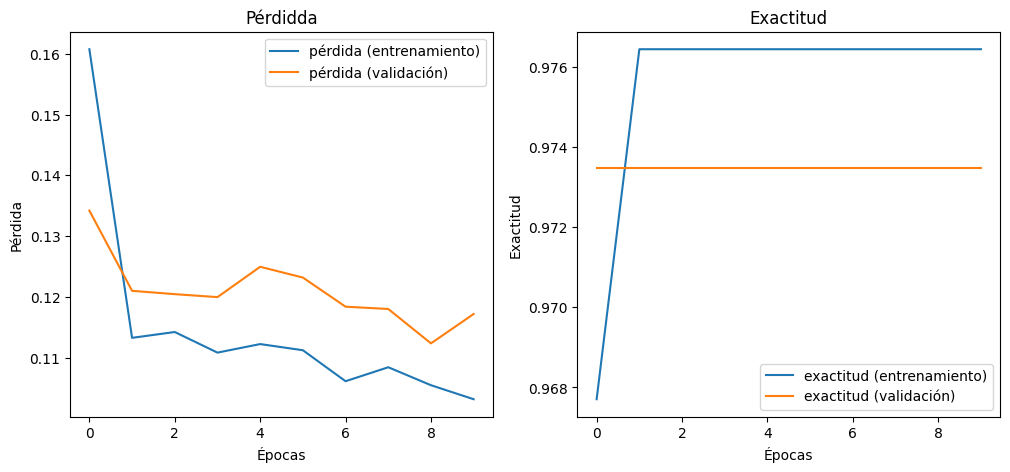

In [10]:
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Input
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

# Cargar el dataset de características
df = pd.read_csv('C:/Users/orzus/OneDrive/Documentos/1C 2024/IA/TP/features_dataset25.csv')

# Separar características y etiquetas
X = df.drop('label', axis=1)
y = df['label']

# Seleccionar solo las columnas numéricas
X = X.select_dtypes(include=[np.number])

# Eliminar filas con valores nulos
X = X.dropna()

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=42)

# Normalizar las características
X_train = (X_train - X_train.mean()) / X_train.std()
X_test = (X_test - X_test.mean()) / X_test.std()

# Convertir etiquetas a categorías
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Definir el modelo CNN
def create_model():
    model = Sequential()
    model.add(Input(shape=(X_train.shape[1], 1)))
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(100, activation='relu'))
    model.add(Dense(y_train.shape[1], activation='sigmoid'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Crear el modelo
model = create_model()

# Entrenar el modelo y guardar el historial
history = model.fit(
    X_train.values.reshape(-1, X_train.shape[1], 1), 
    y_train, 
    epochs=10, 
    batch_size=32, 
    validation_data=(X_test.values.reshape(-1, X_test.shape[1], 1), y_test)
)

# Graficar la función de costo y la exactitud
def plot_history(history):
    # Resumen del historial
    print(history.history.keys())
    
    # Graficar la función de costo
    plt.figure(figsize=(12, 5))
    
    # Pérdida
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='pérdida (entrenamiento)')
    plt.plot(history.history['val_loss'], label='pérdida (validación)')
    plt.title('Pérdidda')
    plt.xlabel('Épocas')
    plt.ylabel('Pérdida')
    plt.legend()

    # Exactitud
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='exactitud (entrenamiento)')
    plt.plot(history.history['val_accuracy'], label='exactitud (validación)')
    plt.title('Exactitud')
    plt.xlabel('Épocas')
    plt.ylabel('Exactitud')
    plt.legend()
    
    plt.show()

# Llamar a la función para graficar
plot_history(history)

## Observación
Una exactitud tan elevada podría ser síntoma de sobreajuste.
Se recomienda ampliar la cantidad de datos y/o realizar validaciones cruzadas, disminuir la cantidad de capas y neuronas. (investigar más)

## Actualización
Errores que provocaban sobreajuste, corregido

In [34]:
import numpy as np

# Seleccionar un índice para la prueba
index = 150  # Índice para probar con diferentes muestras

# Obtener una muestra de X_test
sample = X_test.iloc[index].values.reshape(1, -1, 1)

# Predecir la etiqueta para la muestra
prediction = model.predict(sample)

# Obtener la etiqueta real
real_label = np.argmax(y_test[index])

# Mostrar los resultados
predicted_label = np.argmax(prediction)
print(f'Etiqueta real: {real_label}')
print(f'Predicción del modelo: {predicted_label}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Etiqueta real: 1
Predicción del modelo: 1


192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


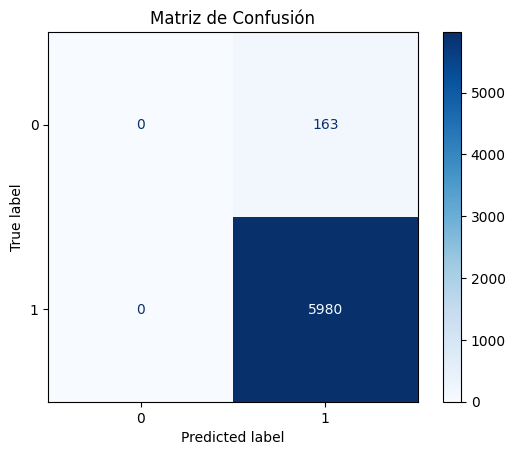

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Hacer predicciones para el conjunto de prueba
predictions = model.predict(X_test.values.reshape(-1, X_test.shape[1], 1))

# Convertir las predicciones y las etiquetas reales a su formato original
y_pred = np.argmax(predictions, axis=1)
y_true = np.argmax(y_test, axis=1)

# Crear la matriz de confusión
cm = confusion_matrix(y_true, y_pred)

# Visualizar la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Matriz de Confusión')
plt.show()

## Observación
El modelo predice bien las fallas, pero no las no fallas, esto podría ser debido al desbalance del conjunto de datos.
Probar reducir el conjunto de datos a un solo tipo de fallas

## Balanceando los datos

## Escogemos un tipo de falla 
(Fault) Bearing (1) Ball & Bearing (2) Inner Trial x

In [71]:
import os
import pickle
import pandas as pd
import numpy as np
from scipy.stats import kurtosis, skew
from scipy.fftpack import fft
from scipy.signal import hilbert
import pywt
from tqdm import tqdm  # Para mostrar una barra de progreso

def extract_features(signal, sampling_rate=6400):
    # Asegurarse de que la señal es numérica
    signal = pd.to_numeric(signal, errors='coerce')
    # Eliminar valores NaN
    signal = signal.dropna()
    # Convertir a array de numpy
    signal = signal.to_numpy()
    
    features = {}

    # Características del dominio del tiempo
    features['mean'] = np.mean(signal)
    features['std'] = np.std(signal)
    features['max'] = np.max(signal)
    features['min'] = np.min(signal)
    features['ptp'] = np.ptp(signal)
    features['kurtosis'] = kurtosis(signal)
    features['skewness'] = skew(signal)
    features['rms'] = np.sqrt(np.mean(signal**2))
    features['crest_factor'] = np.max(np.abs(signal)) / features['rms']

    # Transformada de Fourier
    freqs = fft(signal)
    freqs_abs = np.abs(freqs)
    freqs_norm = freqs_abs / len(signal)  # Normalizar la magnitud de la FFT
    features['fft_mean'] = np.mean(freqs_norm)
    features['fft_std'] = np.std(freqs_norm)
    features['fft_max'] = np.max(freqs_norm)
    features['fft_min'] = np.min(freqs_norm)
    features['fft_ptp'] = np.ptp(freqs_norm)

    # Frecuencia fundamental y armónicos
    freqs_indices = np.fft.fftfreq(len(signal), 1/sampling_rate)
    fundamental_freq_index = np.argmax(freqs_norm[:len(signal)//2])  # Solo considerar la mitad positiva del espectro
    fundamental_freq = freqs_indices[fundamental_freq_index]

    # Características de los armónicos
    num_harmonics = 5
    for i in range(1, num_harmonics + 1):
        harmonic_index = fundamental_freq_index * i
        if harmonic_index < len(freqs_norm):
            features[f'harmonic_{i}_amplitude'] = freqs_norm[harmonic_index]
        else:
            features[f'harmonic_{i}_amplitude'] = 0  # Si el armónico está fuera del rango de la FFT

    # Envelope analysis
    analytic_signal = hilbert(signal)
    amplitude_envelope = np.abs(analytic_signal)
    features['envelope_mean'] = np.mean(amplitude_envelope)
    features['envelope_std'] = np.std(amplitude_envelope)

    # Transformada Wavelet
    coeffs = pywt.wavedec(signal, 'db1', level=5)
    features['wavelet_mean'] = np.mean(coeffs[-1])
    features['wavelet_std'] = np.std(coeffs[-1])

    return features

# Función para extraer etiquetas del nombre del archivo
def get_label_from_filename(filename):
    if '(Fault) Bearing (1) Ball & Bearing (2) Inner Trial' in filename:
        return 1  # Indicador de fallo
    elif '(NoFault)' in filename:
        return 0  # Indicador de no fallo
    else:
        return None  # Etiqueta desconocida

# Directorio donde se encuentran los archivos PLK
directory = 'C:/Users/orzus/OneDrive/Documentos/1C 2024/IA/TP/dataset_plk/split25_plk'
output_file = 'C:/Users/orzus/OneDrive/Documentos/1C 2024/IA/TP/features_dataset25_1.csv'

features_list = []

# Columnas de interés (vibración)
columns_of_interest = ['Tachometer', 'Motor', 'Bearing 1 Z', 'Bearing 1 Y', 'Bearing 1 X',
                      'Bearing 2 Z', 'Bearing 2 Y', 'Bearing 2 X', 'Gearbox']

# Recorrer todos los archivos en el directorio
for filename in tqdm(os.listdir(directory)):
    if filename.endswith(".plk"):
        file_path = os.path.join(directory, filename)
        with open(file_path, 'rb') as f:
            data = pickle.load(f)
        
        label = get_label_from_filename(filename)
        
        # Filtrar solo los archivos con etiquetas válidas
        if label is not None:
            # Extraer características de cada columna de interés
            for col in columns_of_interest:
                if col in data:
                    signal = data[col]
                    features = extract_features(signal)
                    features['column'] = col
                    features['file'] = filename
                    features['label'] = label
                    features_list.append(features)

# Convertir a DataFrame
df_features = pd.DataFrame(features_list)

# Guardar en un archivo CSV
df_features.to_csv(output_file, index=False)

print(f'Características extraídas y guardadas en {output_file}')

100%|████████████████████████████████████████████████████████████████████████████████| 975/975 [00:56<00:00, 17.11it/s]

Características extraídas y guardadas en C:/Users/orzus/OneDrive/Documentos/1C 2024/IA/TP/features_dataset25_1.csv


In [12]:
df2=pd.read_csv('C:/Users/orzus/OneDrive/Documentos/1C 2024/IA/TP/features_dataset25_1.csv')

In [13]:
df2.shape

(450, 26)

Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - accuracy: 0.5077 - loss: 0.6819 - val_accuracy: 0.6667 - val_loss: 0.6365
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7728 - loss: 0.6261 - val_accuracy: 0.6857 - val_loss: 0.5972
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7753 - loss: 0.5844 - val_accuracy: 0.6825 - val_loss: 0.5621
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7677 - loss: 0.5378 - val_accuracy: 0.6730 - val_loss: 0.5370
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8130 - loss: 0.4975 - val_accuracy: 0.7079 - val_loss: 0.5075
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8042 - loss: 0.4552 - val_accuracy: 0.7111 - val_loss: 0.4911
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7973 - loss: 0.4209 - val_accuracy: 0.7143 - val_loss: 0.4839
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8001 - loss: 0.3995 - val_accuracy: 0.8063 - val_loss: 0.4506


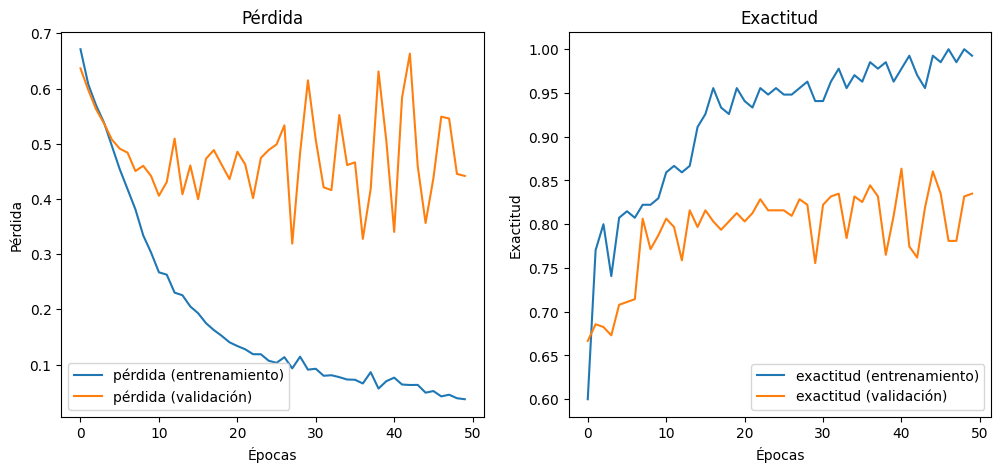

In [14]:
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Input
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

# Cargar el dataset de características
df = pd.read_csv('C:/Users/orzus/OneDrive/Documentos/1C 2024/IA/TP/features_dataset25_1.csv')

# Separar características y etiquetas
X = df.drop('label', axis=1)
y = df['label']

# Seleccionar solo las columnas numéricas
X = X.select_dtypes(include=[np.number])

# Eliminar filas con valores nulos
X = X.dropna()

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=42)

# Normalizar las características
X_train = (X_train - X_train.mean()) / X_train.std()
X_test = (X_test - X_test.mean()) / X_test.std()

# Convertir etiquetas a formato binario (si es necesario)
# No es necesario convertir a categórico ya que estamos usando sigmoid y binary_crossentropy

# Definir el modelo CNN
def create_model():
    model = Sequential()
    model.add(Input(shape=(X_train.shape[1], 1)))
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(100, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))  # Sigmoid para problemas binarios
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy']) 
    return model

# Crear el modelo
model = create_model()

# Entrenar el modelo y guardar el historial
history = model.fit(
    X_train.values.reshape(-1, X_train.shape[1], 1), 
    y_train, 
    epochs=50, 
    batch_size=32, 
    validation_data=(X_test.values.reshape(-1, X_test.shape[1], 1), y_test)
)

# Graficar la función de costo y la exactitud
def plot_history(history):
    # Resumen del historial
    print(history.history.keys())
    
    # Graficar la función de costo
    plt.figure(figsize=(12, 5))
    
    # Pérdida
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='pérdida (entrenamiento)')
    plt.plot(history.history['val_loss'], label='pérdida (validación)')
    plt.title('Pérdida')
    plt.xlabel('Épocas')
    plt.ylabel('Pérdida')
    plt.legend()

    # Exactitud
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='exactitud (entrenamiento)')
    plt.plot(history.history['val_accuracy'], label='exactitud (validación)')
    plt.title('Exactitud')
    plt.xlabel('Épocas')
    plt.ylabel('Exactitud')
    plt.legend()

    plt.savefig('training_history.png')
    plt.show()

# Llamar a la función para graficar
plot_history(history)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


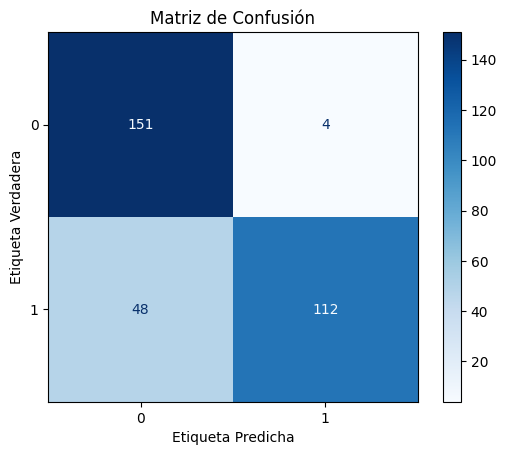

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Realizar predicciones para el conjunto de prueba
predictions = model.predict(X_test.values.reshape(-1, X_test.shape[1], 1))

# Convertir las predicciones a clases binarias
y_pred = (predictions > 0.5).astype(int).flatten()
y_true = y_test.values

# Calcular la matriz de confusión
cm = confusion_matrix(y_true, y_pred, labels=[0, 1])

# Visualizar la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.title('Matriz de Confusión')
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Verdadera')
plt.show()

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


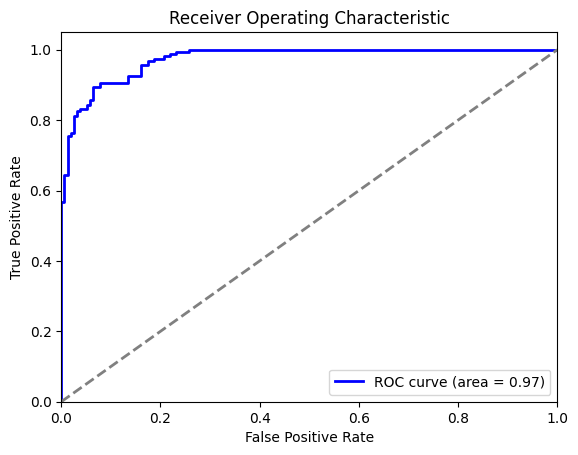

In [52]:
import matplotlib.pyplot as plt

# Obtener las predicciones para el conjunto de prueba
y_pred_prob = model.predict(X_test.values.reshape(-1, X_test.shape[1], 1)).ravel()

# Calcular la curva ROC
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)

# Calcular el AUC
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


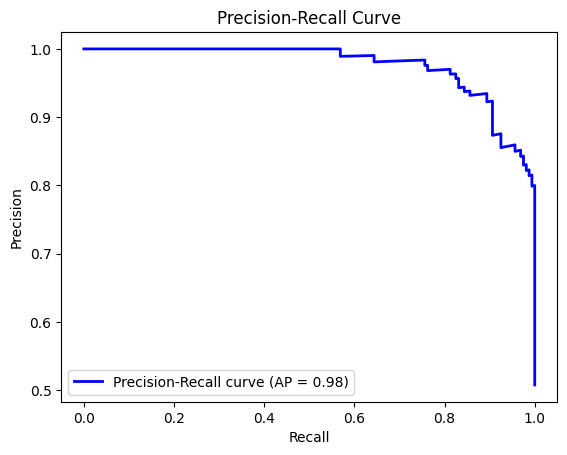

In [53]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

# Obtener las predicciones para el conjunto de prueba
y_pred_prob = model.predict(X_test.values.reshape(-1, X_test.shape[1], 1)).ravel()

# Calcular la curva de Precisión-Recall
precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)

# Calcular la Precisión Media
avg_precision = average_precision_score(y_test, y_pred_prob)

# Graficar la curva de Precisión-Recall
plt.figure()
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve (AP = %0.2f)' % avg_precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()

In [20]:
from graphviz import Digraph

def visualizar_cnn():
    dot = Digraph()

    # Capa de entrada
    dot.node('Input', 'Input\n(shape=(X_train.shape[1], 1))')

    # Primera capa Conv1D
    dot.node('Conv1D_1', 'Conv1D\n(filters=64, kernel_size=3, activation="relu")')
    dot.edge('Input', 'Conv1D_1')

    # Primera capa MaxPooling1D
    dot.node('MaxPooling1D_1', 'MaxPooling1D\n(pool_size=2)')
    dot.edge('Conv1D_1', 'MaxPooling1D_1')

    # Segunda capa Conv1D
    dot.node('Conv1D_2', 'Conv1D\n(filters=128, kernel_size=3, activation="relu")')
    dot.edge('MaxPooling1D_1', 'Conv1D_2')

    # Segunda capa MaxPooling1D
    dot.node('MaxPooling1D_2', 'MaxPooling1D\n(pool_size=2)')
    dot.edge('Conv1D_2', 'MaxPooling1D_2')

    # Capa Flatten
    dot.node('Flatten', 'Flatten')
    dot.edge('MaxPooling1D_2', 'Flatten')

    # Capa densa
    dot.node('Dense_1', 'Dense\n(units=100, activation="relu")')
    dot.edge('Flatten', 'Dense_1')

    # Capa de salida
    dot.node('Output', 'Dense\n(units=1, activation="sigmoid")')
    dot.edge('Dense_1', 'Output')

    return dot

cnn_viz = visualizar_cnn()
cnn_viz.render('cnn_diagram', format='png', view=True)

'cnn_diagram.png'

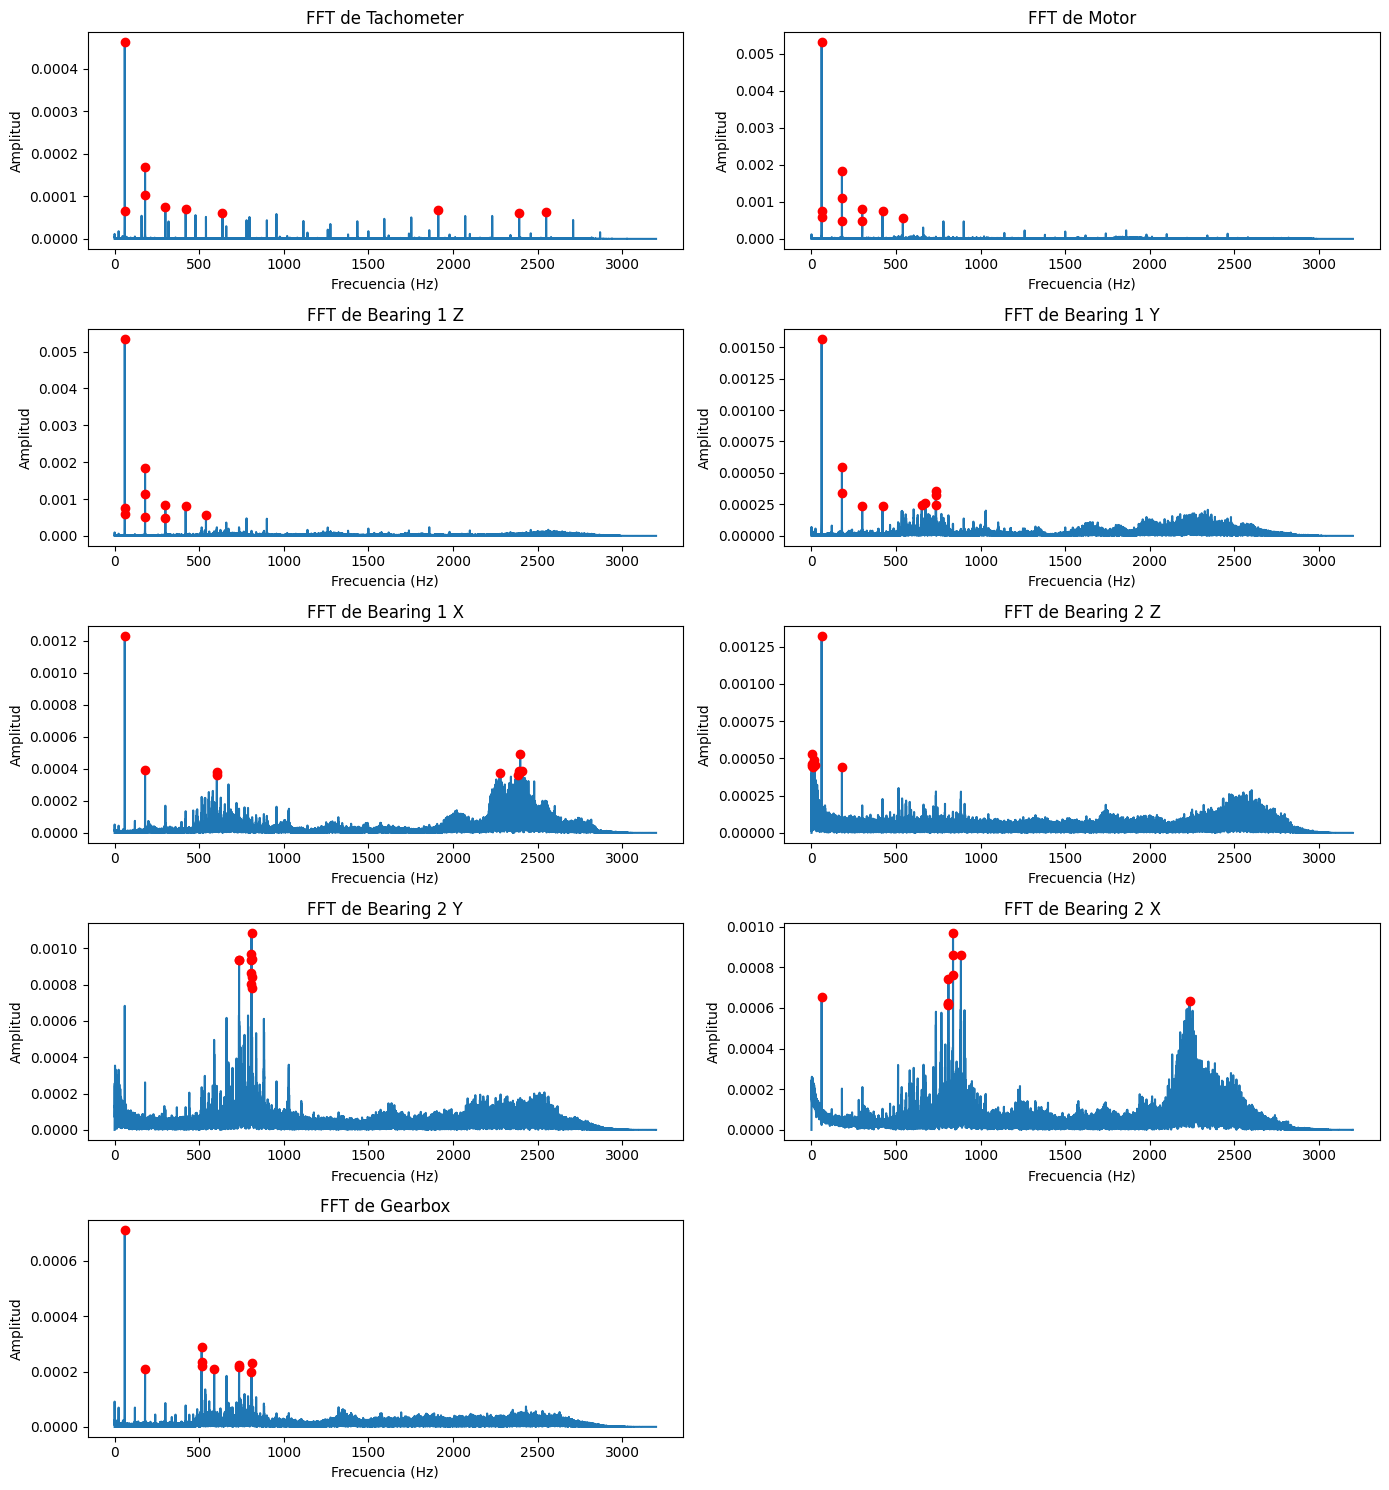

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

# Cargar el archivo .plk
file_path = 'C:/Users/orzus/OneDrive/Documentos/1C 2024/IA/TP/dataset_plk/split25_plk/(Fault) Bearing (1) Ball & Bearing (2) Combination Trial 1.plk'
data = pd.read_pickle(file_path)

# Convertir la columna 'Time' a valores numéricos
data['Time'] = pd.to_numeric(data['Time'])

# Función para graficar la FFT de una columna dada
def plot_fft(column_data, column_name, ax):
    N = len(column_data)
    T = data['Time'].iloc[1] - data['Time'].iloc[0]  # Intervalo de muestreo
    yf = fft(column_data)
    xf = fftfreq(N, T)[:N//2]

    # Eliminar el pico de frecuencia cero estableciéndolo a cero
    yf[0] = 0

    # Graficar la FFT
    ax.plot(xf, 2.0/N * np.abs(yf[:N//2]), label='FFT')

    # Identificar los picos de los primeros 10 armónicos
    amplitudes = 2.0/N * np.abs(yf[:N//2])
    peak_indices = np.argsort(amplitudes)[-10:][::-1]  # Obtener los índices de los 10 picos más altos

    # Dibujar círculos rojos en los picos
    for peak in peak_indices:
        ax.plot(xf[peak], amplitudes[peak], 'ro')

    ax.set_title(f'FFT de {column_name}')
    ax.set_xlabel('Frecuencia (Hz)')
    ax.set_ylabel('Amplitud')

# Columnas a procesar (excluyendo 'Time')
columns_to_process = [col for col in data.columns if col != 'Time']

# Ajustar la creación de subplots para manejar un número impar de columnas
n_cols = 2
n_rows = (len(columns_to_process) + 1) // n_cols

# Crear subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(14, 3*n_rows))

# Aplanar la matriz de ejes para iteración fácil
axes = axes.flatten()

# Graficar la FFT para cada columna
for i, col in enumerate(columns_to_process):
    plot_fft(data[col], col, axes[i])

# Eliminar cualquier subplot no utilizado
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

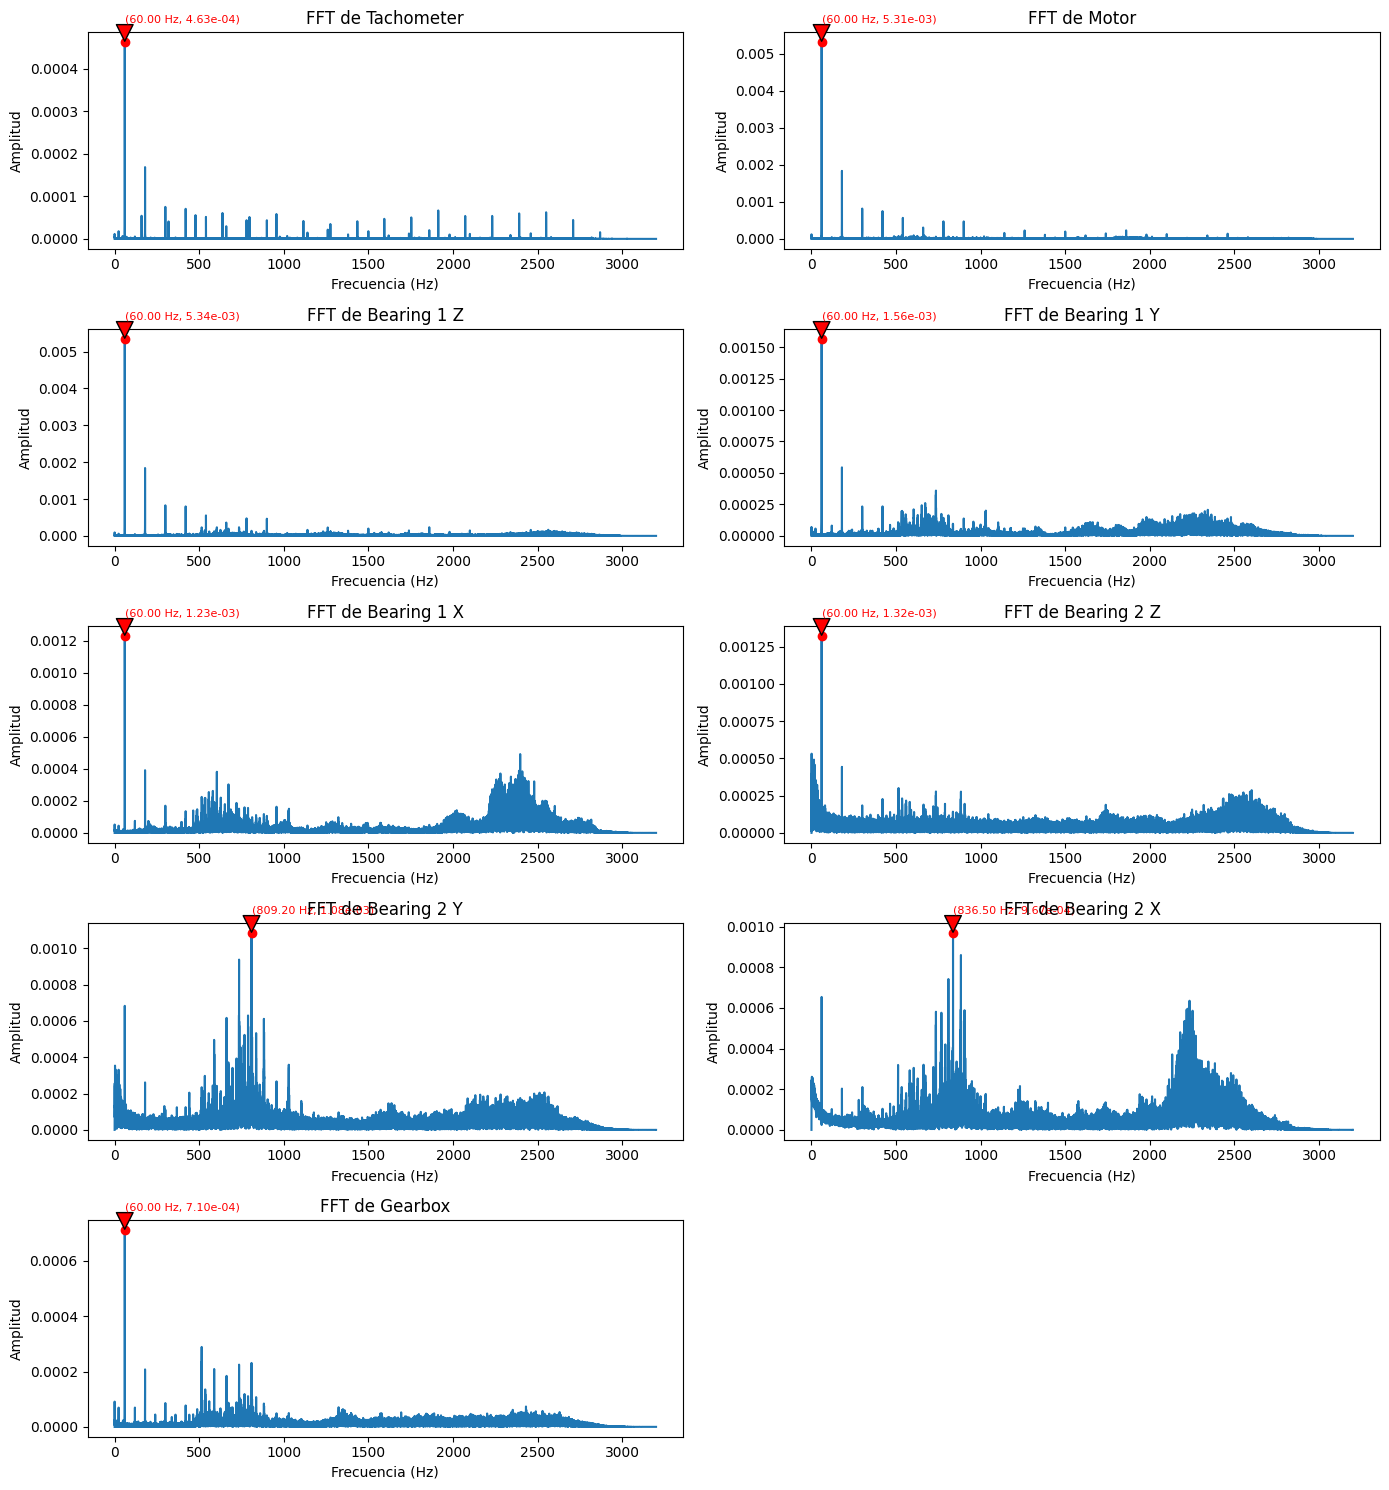

Columna: Tachometer, Frecuencia máxima: 60.00 Hz, Amplitud máxima: 4.63e-04
Columna: Motor, Frecuencia máxima: 60.00 Hz, Amplitud máxima: 5.31e-03
Columna: Bearing 1 Z, Frecuencia máxima: 60.00 Hz, Amplitud máxima: 5.34e-03
Columna: Bearing 1 Y, Frecuencia máxima: 60.00 Hz, Amplitud máxima: 1.56e-03
Columna: Bearing 1 X, Frecuencia máxima: 60.00 Hz, Amplitud máxima: 1.23e-03
Columna: Bearing 2 Z, Frecuencia máxima: 60.00 Hz, Amplitud máxima: 1.32e-03
Columna: Bearing 2 Y, Frecuencia máxima: 809.20 Hz, Amplitud máxima: 1.08e-03
Columna: Bearing 2 X, Frecuencia máxima: 836.50 Hz, Amplitud máxima: 9.67e-04
Columna: Gearbox, Frecuencia máxima: 60.00 Hz, Amplitud máxima: 7.10e-04


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

# Cargar el archivo .plk
file_path = 'C:/Users/orzus/OneDrive/Documentos/1C 2024/IA/TP/dataset_plk/split25_plk/(Fault) Bearing (1) Ball & Bearing (2) Combination Trial 1.plk'
data = pd.read_pickle(file_path)

# Convertir la columna 'Time' a valores numéricos
data['Time'] = pd.to_numeric(data['Time'])

# Función para graficar la FFT de una columna dada
def plot_fft(column_data, column_name, ax):
    N = len(column_data)
    T = data['Time'].iloc[1] - data['Time'].iloc[0]  # Intervalo de muestreo
    yf = fft(column_data)
    xf = fftfreq(N, T)[:N//2]

    # Eliminar el pico de frecuencia cero estableciéndolo a cero
    yf[0] = 0

    # Calcular amplitudes y frecuencias
    amplitudes = 2.0/N * np.abs(yf[:N//2])

    # Identificar el pico más alto
    max_index = np.argmax(amplitudes)
    max_frequency = xf[max_index]
    max_amplitude = amplitudes[max_index]

    # Graficar la FFT
    ax.plot(xf, amplitudes, label='FFT')

    # Dibujar un círculo rojo en el pico más alto
    ax.plot(max_frequency, max_amplitude, 'ro')

    # Mostrar valores del pico más alto
    ax.annotate(f'({max_frequency:.2f} Hz, {max_amplitude:.2e})', 
                xy=(max_frequency, max_amplitude), 
                xytext=(max_frequency, max_amplitude*1.1),
                arrowprops=dict(facecolor='red', shrink=0.05),
                fontsize=8, color='red')

    ax.set_title(f'FFT de {column_name}')
    ax.set_xlabel('Frecuencia (Hz)')
    ax.set_ylabel('Amplitud')

    return max_frequency, max_amplitude

# Columnas a procesar (excluyendo 'Time')
columns_to_process = [col for col in data.columns if col != 'Time']

# Ajustar la creación de subplots para manejar un número impar de columnas
n_cols = 2
n_rows = (len(columns_to_process) + 1) // n_cols

# Crear subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(14, 3*n_rows))

# Aplanar la matriz de ejes para iteración fácil
axes = axes.flatten()

# Graficar la FFT para cada columna y almacenar los picos más altos
peak_values = {}

for i, col in enumerate(columns_to_process):
    max_freq, max_amp = plot_fft(data[col], col, axes[i])
    peak_values[col] = (max_freq, max_amp)

# Eliminar cualquier subplot no utilizado
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# Mostrar los valores de frecuencia y amplitud máximos
for col, (freq, amp) in peak_values.items():
    print(f'Columna: {col}, Frecuencia máxima: {freq:.2f} Hz, Amplitud máxima: {amp:.2e}')

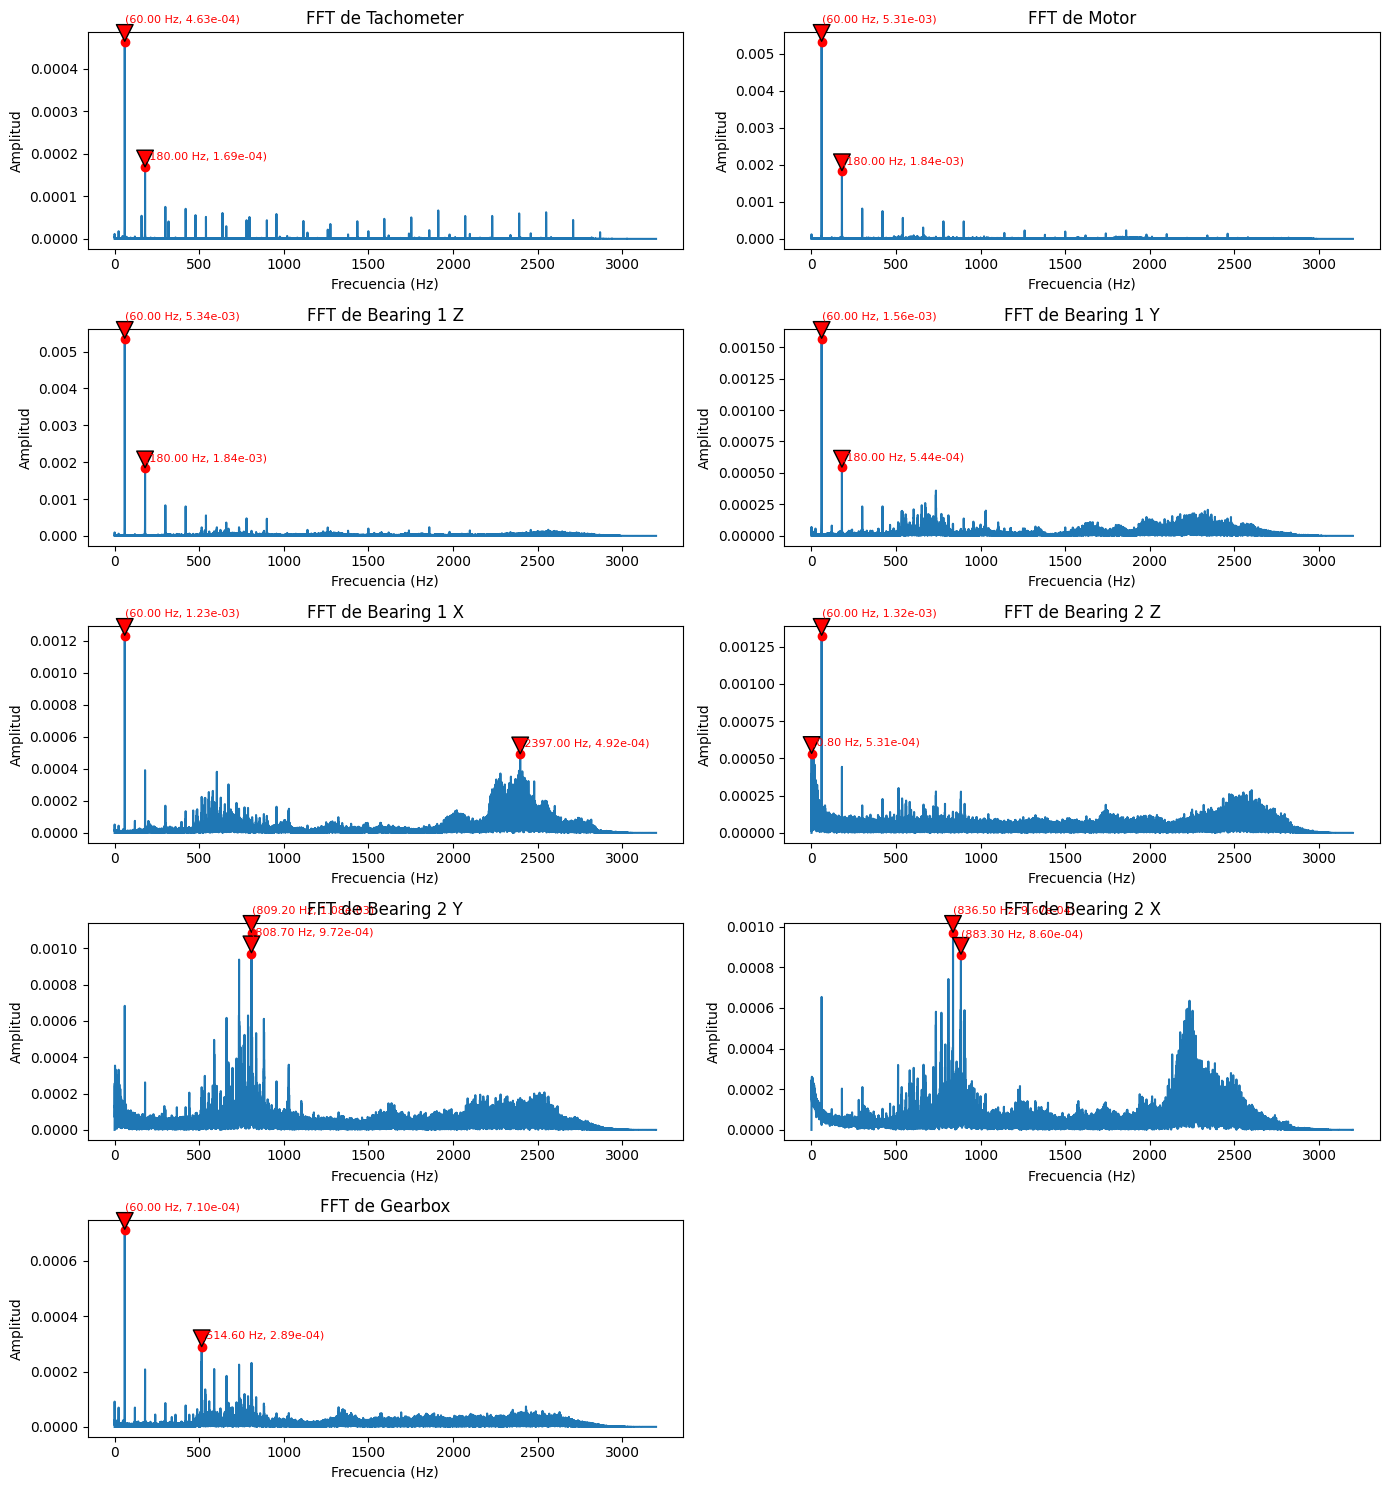

Columna: Tachometer
  Pico 1: Frecuencia: 60.00 Hz, Amplitud: 4.63e-04
  Pico 2: Frecuencia: 180.00 Hz, Amplitud: 1.69e-04
Columna: Motor
  Pico 1: Frecuencia: 60.00 Hz, Amplitud: 5.31e-03
  Pico 2: Frecuencia: 180.00 Hz, Amplitud: 1.84e-03
Columna: Bearing 1 Z
  Pico 1: Frecuencia: 60.00 Hz, Amplitud: 5.34e-03
  Pico 2: Frecuencia: 180.00 Hz, Amplitud: 1.84e-03
Columna: Bearing 1 Y
  Pico 1: Frecuencia: 60.00 Hz, Amplitud: 1.56e-03
  Pico 2: Frecuencia: 180.00 Hz, Amplitud: 5.44e-04
Columna: Bearing 1 X
  Pico 1: Frecuencia: 60.00 Hz, Amplitud: 1.23e-03
  Pico 2: Frecuencia: 2397.00 Hz, Amplitud: 4.92e-04
Columna: Bearing 2 Z
  Pico 1: Frecuencia: 60.00 Hz, Amplitud: 1.32e-03
  Pico 2: Frecuencia: 0.80 Hz, Amplitud: 5.31e-04
Columna: Bearing 2 Y
  Pico 1: Frecuencia: 809.20 Hz, Amplitud: 1.08e-03
  Pico 2: Frecuencia: 808.70 Hz, Amplitud: 9.72e-04
Columna: Bearing 2 X
  Pico 1: Frecuencia: 836.50 Hz, Amplitud: 9.67e-04
  Pico 2: Frecuencia: 883.30 Hz, Amplitud: 8.60e-04
Columna: Gearb

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

# Cargar el archivo .plk
file_path = 'C:/Users/orzus/OneDrive/Documentos/1C 2024/IA/TP/dataset_plk/split25_plk/(Fault) Bearing (1) Ball & Bearing (2) Combination Trial 1.plk'
data = pd.read_pickle(file_path)

# Convertir la columna 'Time' a valores numéricos
data['Time'] = pd.to_numeric(data['Time'])

# Función para graficar la FFT de una columna dada
def plot_fft(column_data, column_name, ax):
    N = len(column_data)
    T = data['Time'].iloc[1] - data['Time'].iloc[0]  # Intervalo de muestreo
    yf = fft(column_data)
    xf = fftfreq(N, T)[:N//2]

    # Eliminar el pico de frecuencia cero estableciéndolo a cero
    yf[0] = 0

    # Calcular amplitudes y frecuencias
    amplitudes = 2.0/N * np.abs(yf[:N//2])

    # Identificar los dos picos más altos
    peak_indices = np.argsort(amplitudes)[-2:][::-1]
    peak_frequencies = xf[peak_indices]
    peak_amplitudes = amplitudes[peak_indices]

    # Graficar la FFT
    ax.plot(xf, amplitudes, label='FFT')

    # Dibujar círculos rojos en los dos picos más altos
    for freq, amp in zip(peak_frequencies, peak_amplitudes):
        ax.plot(freq, amp, 'ro')
        ax.annotate(f'({freq:.2f} Hz, {amp:.2e})', 
                    xy=(freq, amp), 
                    xytext=(freq, amp*1.1),
                    arrowprops=dict(facecolor='red', shrink=0.05),
                    fontsize=8, color='red')

    ax.set_title(f'FFT de {column_name}')
    ax.set_xlabel('Frecuencia (Hz)')
    ax.set_ylabel('Amplitud')

    return list(zip(peak_frequencies, peak_amplitudes))

# Columnas a procesar (excluyendo 'Time')
columns_to_process = [col for col in data.columns if col != 'Time']

# Ajustar la creación de subplots para manejar un número impar de columnas
n_cols = 2
n_rows = (len(columns_to_process) + 1) // n_cols

# Crear subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(14, 3*n_rows))

# Aplanar la matriz de ejes para iteración fácil
axes = axes.flatten()

# Graficar la FFT para cada columna y almacenar los picos más altos
peak_values = {}

for i, col in enumerate(columns_to_process):
    peaks = plot_fft(data[col], col, axes[i])
    peak_values[col] = peaks

# Eliminar cualquier subplot no utilizado
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# Mostrar los valores de frecuencia y amplitud máximos
for col, peaks in peak_values.items():
    print(f'Columna: {col}')
    for i, (freq, amp) in enumerate(peaks):
        print(f'  Pico {i+1}: Frecuencia: {freq:.2f} Hz, Amplitud: {amp:.2e}')

Todas las frecuencias son positivas para el sensor Tachometer
Sensor: Tachometer, Frecuencia Fundamental: 47.300000000000004, Amplitud Fundamental: 42473.8433654536
Todas las frecuencias son positivas para el sensor Motor
Sensor: Motor, Frecuencia Fundamental: 60.0, Amplitud Fundamental: 168.33282203412966
Todas las frecuencias son positivas para el sensor Bearing 1 Z
Sensor: Bearing 1 Z, Frecuencia Fundamental: 60.0, Amplitud Fundamental: 168.86570984631248
Todas las frecuencias son positivas para el sensor Bearing 1 Y
Sensor: Bearing 1 Y, Frecuencia Fundamental: 60.0, Amplitud Fundamental: 53.83158349341237
Todas las frecuencias son positivas para el sensor Bearing 1 X
Sensor: Bearing 1 X, Frecuencia Fundamental: 60.0, Amplitud Fundamental: 40.05369275606582
Todas las frecuencias son positivas para el sensor Bearing 2 Z
Sensor: Bearing 2 Z, Frecuencia Fundamental: 60.0, Amplitud Fundamental: 43.162321001597384
Todas las frecuencias son positivas para el sensor Bearing 2 Y
Sensor: Bea

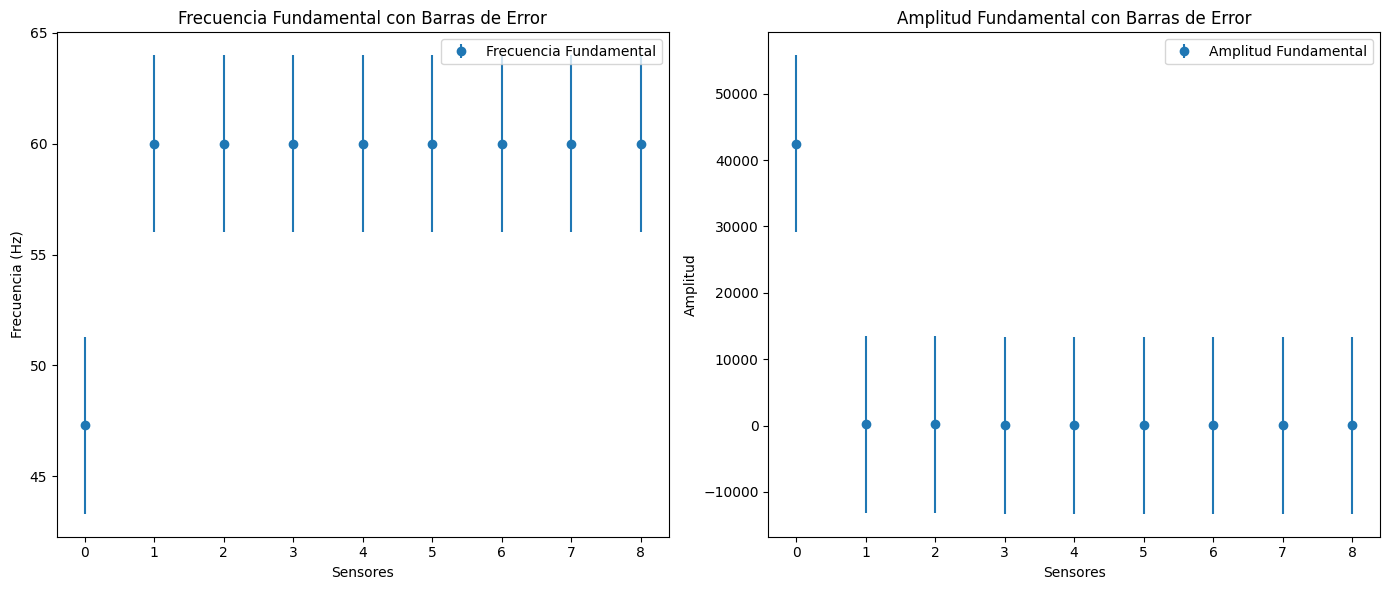

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

# Cargar el archivo .plk
file_path = 'C:/Users/orzus/OneDrive/Documentos/1C 2024/IA/TP/dataset_plk/split25_plk/(NoFault) No Fault Trial 1.plk'
df = pd.read_pickle(file_path)

def obtener_fft(senal, fs):
    N = len(senal)
    fft_vals = np.abs(fft(senal))
    freqs = fftfreq(N, 1/fs)
    # Tomar solo la mitad positiva del espectro
    half_N = N // 2
    fft_vals = fft_vals[:half_N]
    freqs = freqs[:half_N]
    # Filtrar frecuencias negativas
    mask = freqs > 0
    fft_vals = fft_vals[mask]
    freqs = freqs[mask]
    return freqs, fft_vals

def obtener_frecuencia_fundamental(frecuencia, amplitud):
    if len(frecuencia) > 0:
        indice_fundamental = np.argmax(amplitud)
        return frecuencia[indice_fundamental], amplitud[indice_fundamental]
    return None, None

fs = 6400  # Frecuencia de muestreo en Hz
frecuencias_fund = []
amplitudes_fund = []

# Excluir la columna de tiempo
columnas_interes = [col for col in df.columns if col.lower() != 'time']

for sensor in columnas_interes:
    freqs, amps = obtener_fft(df[sensor].values, fs)
    # Verificar frecuencias negativas
    if any(freqs < 0):
        print(f"Frecuencias negativas en {sensor}: {freqs[freqs < 0]}")
    else:
        print(f"Todas las frecuencias son positivas para el sensor {sensor}")
    freq_fund, amp_fund = obtener_frecuencia_fundamental(freqs, amps)
    if freq_fund is not None and freq_fund > 0:
        frecuencias_fund.append(freq_fund)
        amplitudes_fund.append(amp_fund)
    print(f"Sensor: {sensor}, Frecuencia Fundamental: {freq_fund}, Amplitud Fundamental: {amp_fund}")

print("Frecuencias fundamentales:", frecuencias_fund)
print("Amplitudes fundamentales:", amplitudes_fund)

media_frec = np.mean(frecuencias_fund)
desviacion_frec = np.std(frecuencias_fund)
media_amp = np.mean(amplitudes_fund)
desviacion_amp = np.std(amplitudes_fund)

# Crear dos gráficos por fila
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Graficar Frecuencia Fundamental
ax1.errorbar(range(len(frecuencias_fund)), frecuencias_fund, yerr=desviacion_frec, fmt='o', label='Frecuencia Fundamental')
ax1.set_xlabel('Sensores')
ax1.set_ylabel('Frecuencia (Hz)')
ax1.set_title('Frecuencia Fundamental con Barras de Error')
ax1.legend()

# Graficar Amplitud Fundamental
ax2.errorbar(range(len(amplitudes_fund)), amplitudes_fund, yerr=desviacion_amp, fmt='o', label='Amplitud Fundamental')
ax2.set_xlabel('Sensores')
ax2.set_ylabel('Amplitud')
ax2.set_title('Amplitud Fundamental con Barras de Error')
ax2.legend()

# Guardar la imagen con los dos gráficos
plt.tight_layout()
plt.savefig('graf2.png')
plt.show()